Kamień milowy 1 - Eksploracyjna Analiza Danych

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv("lung_cancer_prediction_dataset.csv")
df = data.copy()

a. Wyznaczenie celu biznesowego – podział zmienne objaśniające i zmienną objaśnianą

Zmienna objaśniana - "Lung_Cancer_Diagnosis", chcemy na podstawie zmiennych objaśniających zdiagnozować pacjenta.

Zmienne objaśniane - wszystkie kolumny, oprócz tych dotyczących stadium choroby

b. Analiza statystyczna i wizualizacja – obliczenie podstawowych miar statystycznych (np. średnia, mediana, odchylenie standardowe), wykresy (np. histogramy, wykresy pudełkowe, macierze korelacji).

c. Identyfikacja braków danych i anomalii – wykrywanie brakujących wartości, analiza wartości odstających i ich potencjalny wpływ na model.

d. Badanie zależności między zmiennymi – analiza korelacji między cechami, wykrywanie redundancji, eksploracja rozkładów zmiennych względem etykiety docelowej.

In [14]:
# Postawowe miary statystyczne
df_chorzy = df[df['Lung_Cancer_Diagnosis'] == 'Yes']
print(f"Średnia wieku badanych osób: {statistics.mean(df['Age'])}")
print(f"Mediana wieku badanych osób: {statistics.median(df['Age'])}")
print(f"Odchylenie standardowe wieku badanych osób: {statistics.stdev(df['Age'])}")
print(f"Średnia wieku osób, u których zdiagnozowano raka płuc: {statistics.mean(df_chorzy['Age'])}")
print(f"Mediana wieku osób, u których zdiagnozowano raka płuc: {statistics.median(df_chorzy['Age'])}")
print(f"Odchylenie standardowe wieku osób, u których zdiagnozowano raka płuc: {statistics.stdev(df_chorzy['Age'])}")

Średnia wieku badanych osób: 52.51835182566445
Mediana wieku badanych osób: 53.0
Odchylenie standardowe wieku badanych osób: 19.078214777278557
Średnia wieku osób, u których zdiagnozowano raka płuc: 52.664657962281
Mediana wieku osób, u których zdiagnozowano raka płuc: 53
Odchylenie standardowe wieku osób, u których zdiagnozowano raka płuc: 19.176527508237257


In [15]:
# Liczba wierszy z danego kraju
total_per_country = df['Country'].value_counts()

# Liczba osób z rakiem w każdym kraju
cancer_per_country = df[df['Lung_Cancer_Diagnosis'] == 'Yes'].groupby('Country').size()

smokers = df[df['Smoker'] == 'Yes'].groupby('Country').size()

average_age = df[(df['Smoker'] == 'Yes') & (df['Lung_Cancer_Diagnosis'] == 'Yes') ].groupby('Country')['Age'].mean()


# Łączenie wyników
result = pd.DataFrame({
    'Total Rows': total_per_country,
    'Lung Cancer Diagnosed': cancer_per_country,
    'Smokers' : smokers,
    'Avarage age of smoker': average_age
}).fillna(0).astype(int)

# Wyświetlenie wyniku
print(result)

              Total Rows  Lung Cancer Diagnosed  Smokers  \
Country                                                    
Bangladesh          8821                    361     3538   
Brazil              8800                    353     3506   
China               8907                    338     3500   
DR Congo            8861                    364     3488   
Egypt               8822                    371     3514   
Ethiopia            8975                    409     3692   
France              8920                    365     3623   
Germany             8727                    332     3501   
India               8752                    335     3532   
Indonesia           8771                    366     3550   
Iran                8778                    326     3509   
Italy               8802                    372     3518   
Japan               8989                    398     3594   
Mexico              8837                    336     3567   
Myanmar             8819                

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220632 entries, 0 to 220631
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ID                           220632 non-null  int64  
 1   Country                      220632 non-null  object 
 2   Population_Size              220632 non-null  int64  
 3   Age                          220632 non-null  int64  
 4   Gender                       220632 non-null  object 
 5   Smoker                       220632 non-null  object 
 6   Years_of_Smoking             220632 non-null  int64  
 7   Cigarettes_per_Day           220632 non-null  int64  
 8   Passive_Smoker               220632 non-null  object 
 9   Family_History               220632 non-null  object 
 10  Lung_Cancer_Diagnosis        220632 non-null  object 
 11  Cancer_Stage                 8961 non-null    object 
 12  Survival_Years               220632 non-null  int64  
 13 

In [17]:
print("\nPodstawowe statystyki opisowe: \n", df.describe())


Podstawowe statystyki opisowe: 
                   ID  Population_Size            Age  Years_of_Smoking  \
count  220632.000000    220632.000000  220632.000000     220632.000000   
mean   110315.500000       229.779882      52.518352          8.175274   
std     63691.116633       349.247477      19.078215         12.377248   
min         0.000000        54.000000      20.000000          0.000000   
25%     55157.750000        83.000000      36.000000          0.000000   
50%    110315.500000       113.000000      53.000000          0.000000   
75%    165473.250000       206.000000      69.000000         15.000000   
max    220631.000000      1400.000000      85.000000         40.000000   

       Cigarettes_per_Day  Survival_Years  Annual_Lung_Cancer_Deaths  \
count       220632.000000   220632.000000              220632.000000   
mean             7.007515        0.223526               63931.086928   
std              9.802187        1.231025              130690.126777   
min        

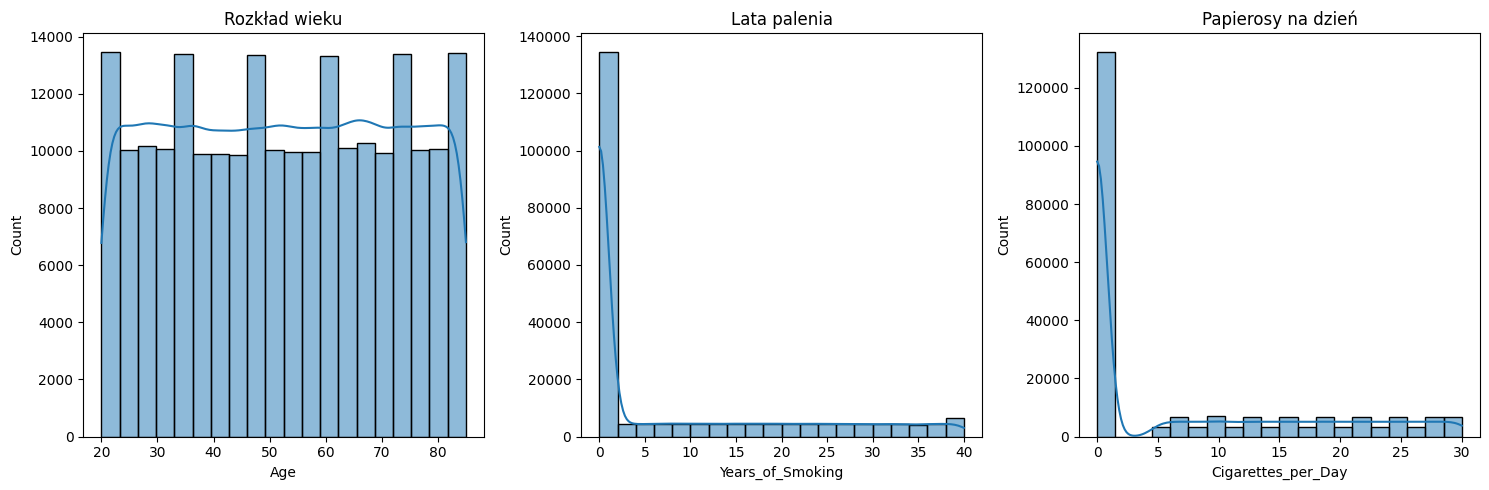

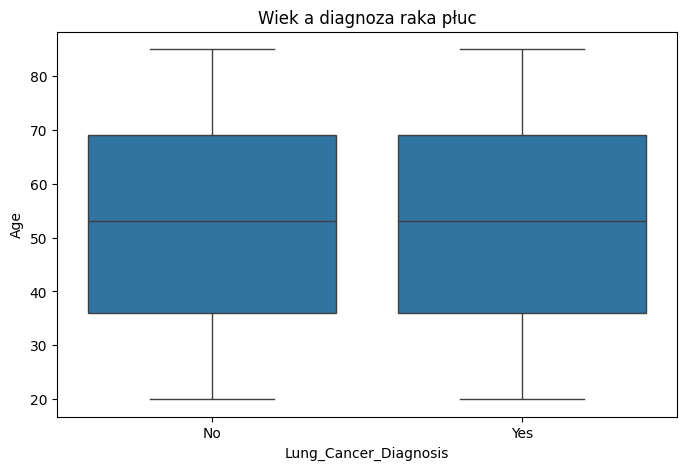

In [18]:
# Tworzenie wykresów
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogramy
sns.histplot(df["Age"], bins=20, kde=True, ax=axes[0]).set(title="Rozkład wieku")
sns.histplot(df["Years_of_Smoking"], bins=20, kde=True, ax=axes[1]).set(title="Lata palenia")
sns.histplot(df["Cigarettes_per_Day"], bins=20, kde=True, ax=axes[2]).set(title="Papierosy na dzień")

plt.tight_layout()
plt.show()

# Wykres pudełkowy
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Lung_Cancer_Diagnosis"], y=df["Age"])
plt.title("Wiek a diagnoza raka płuc")
plt.show()

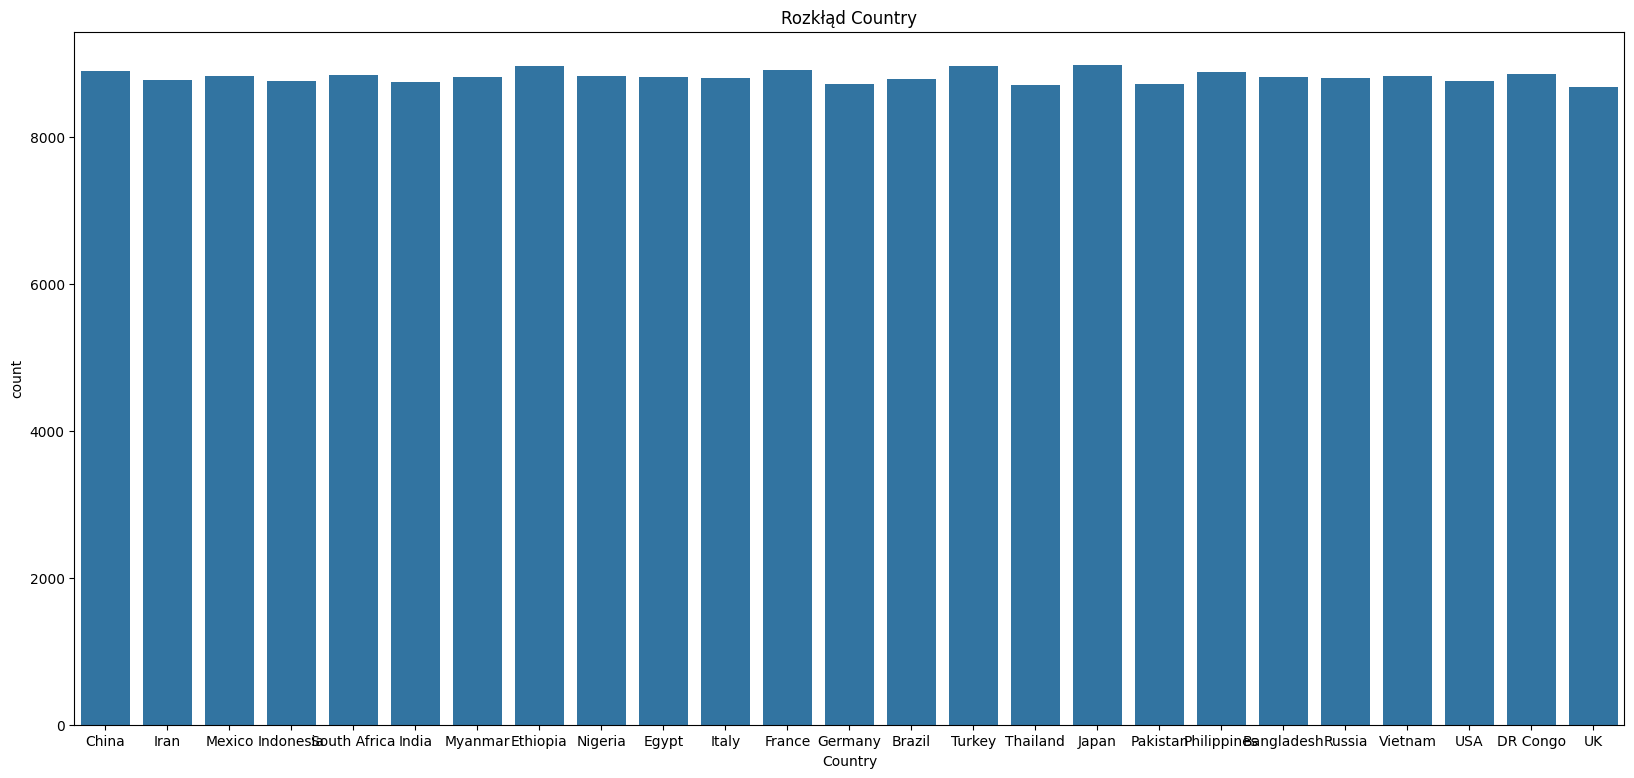

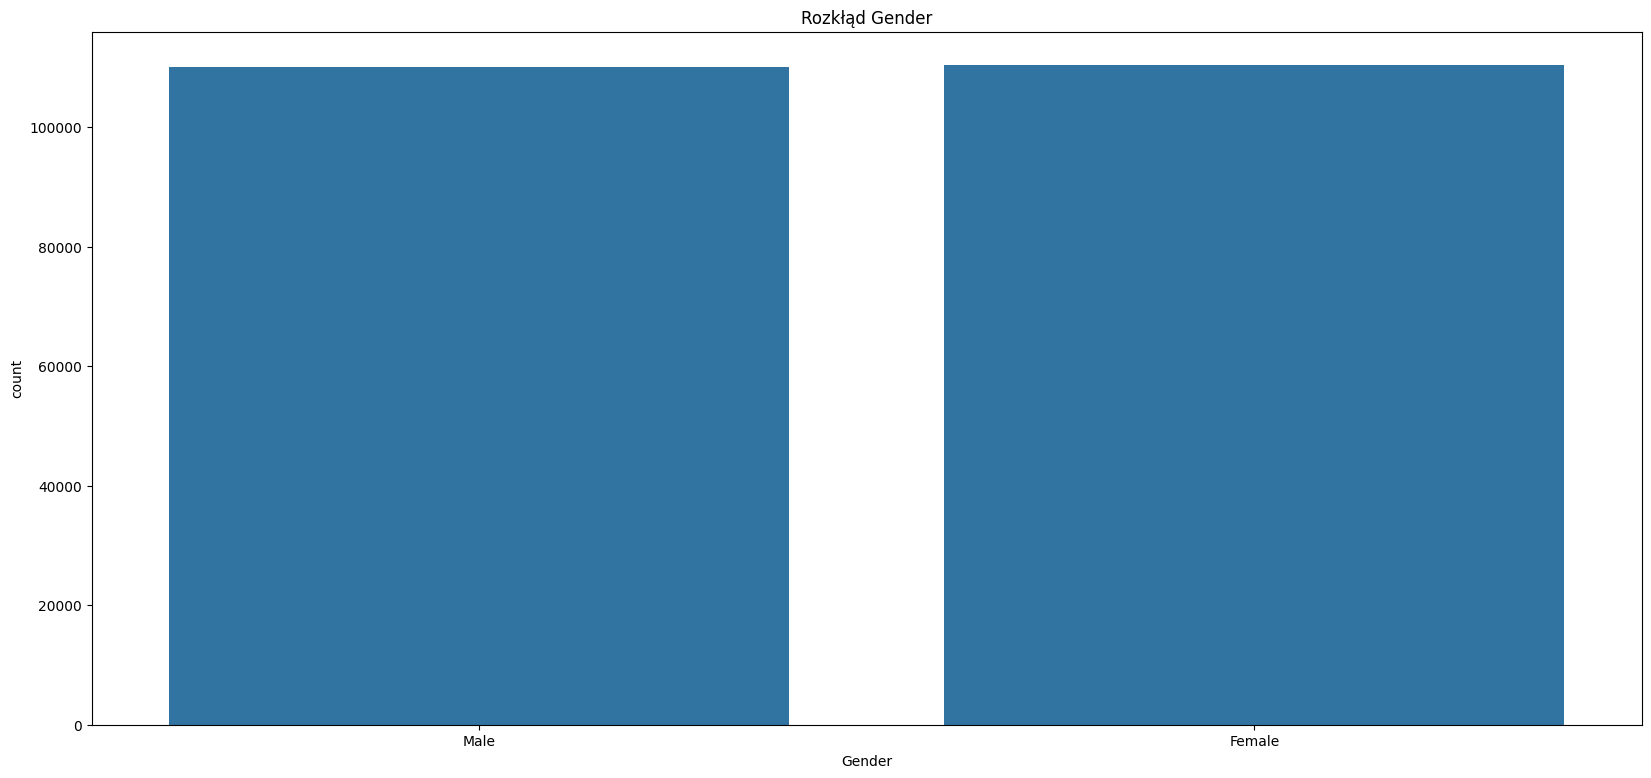

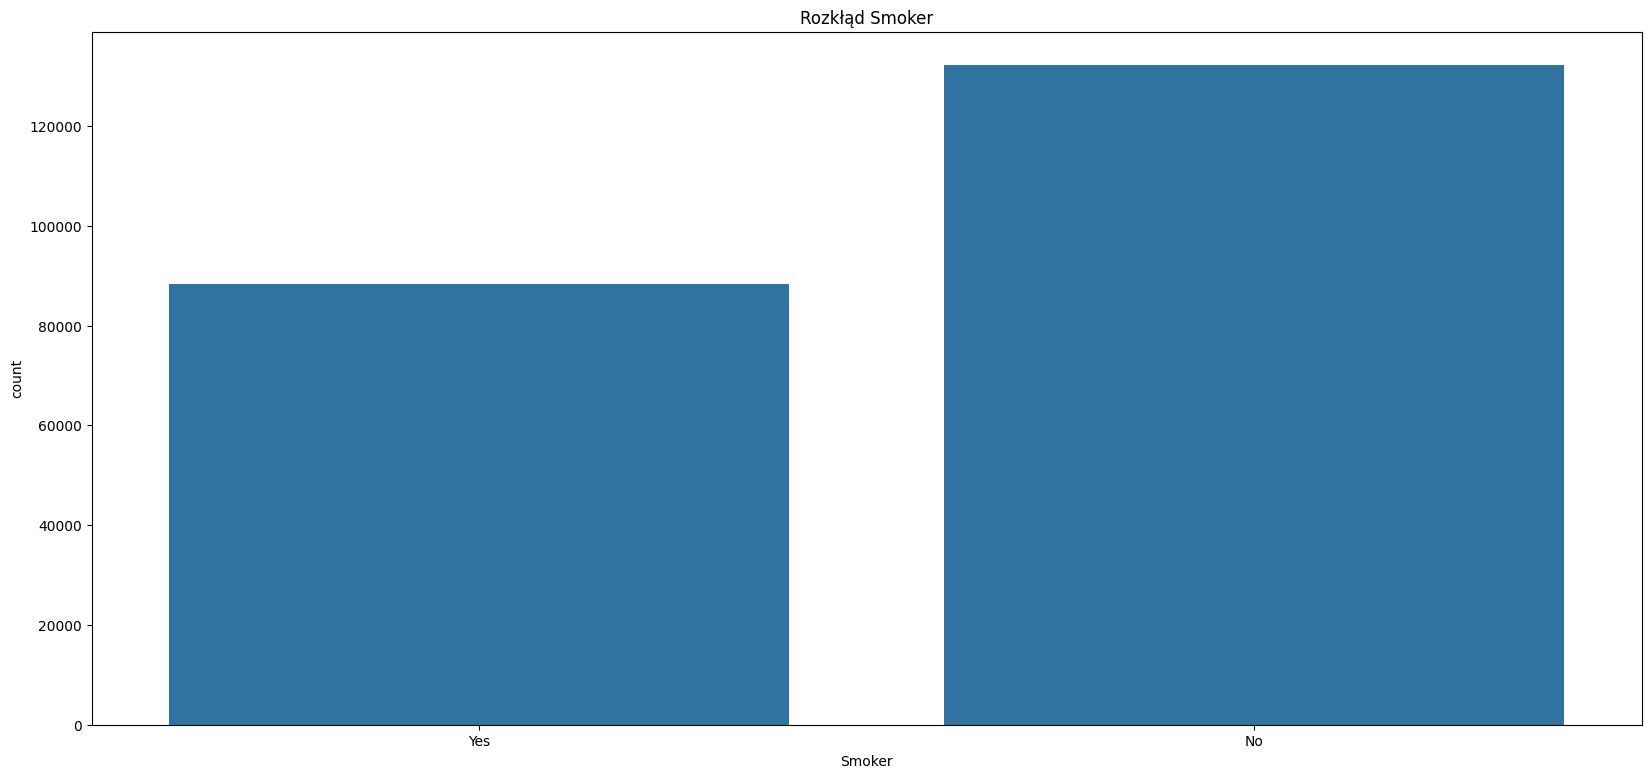

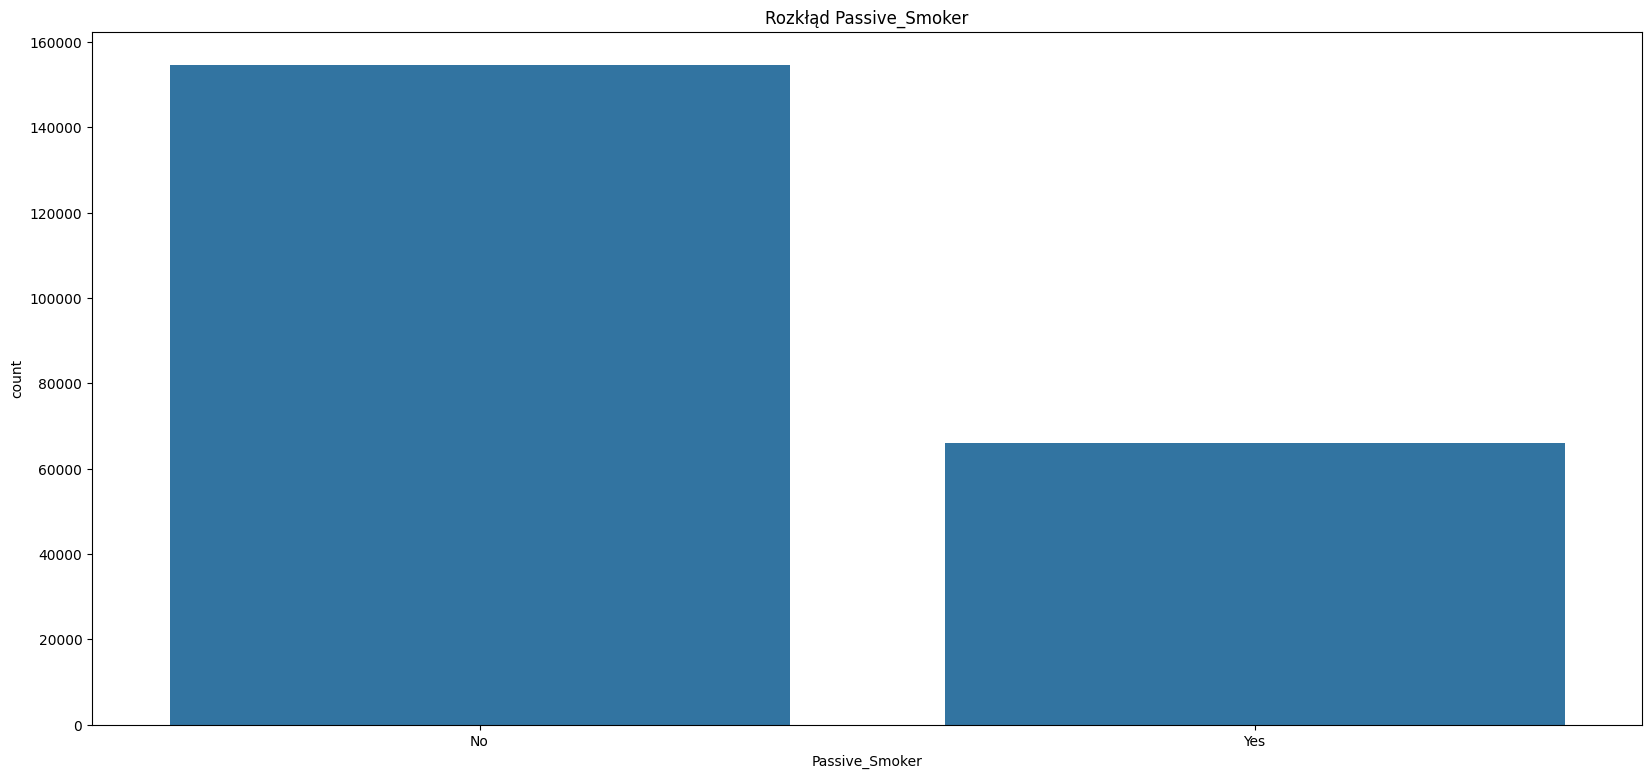

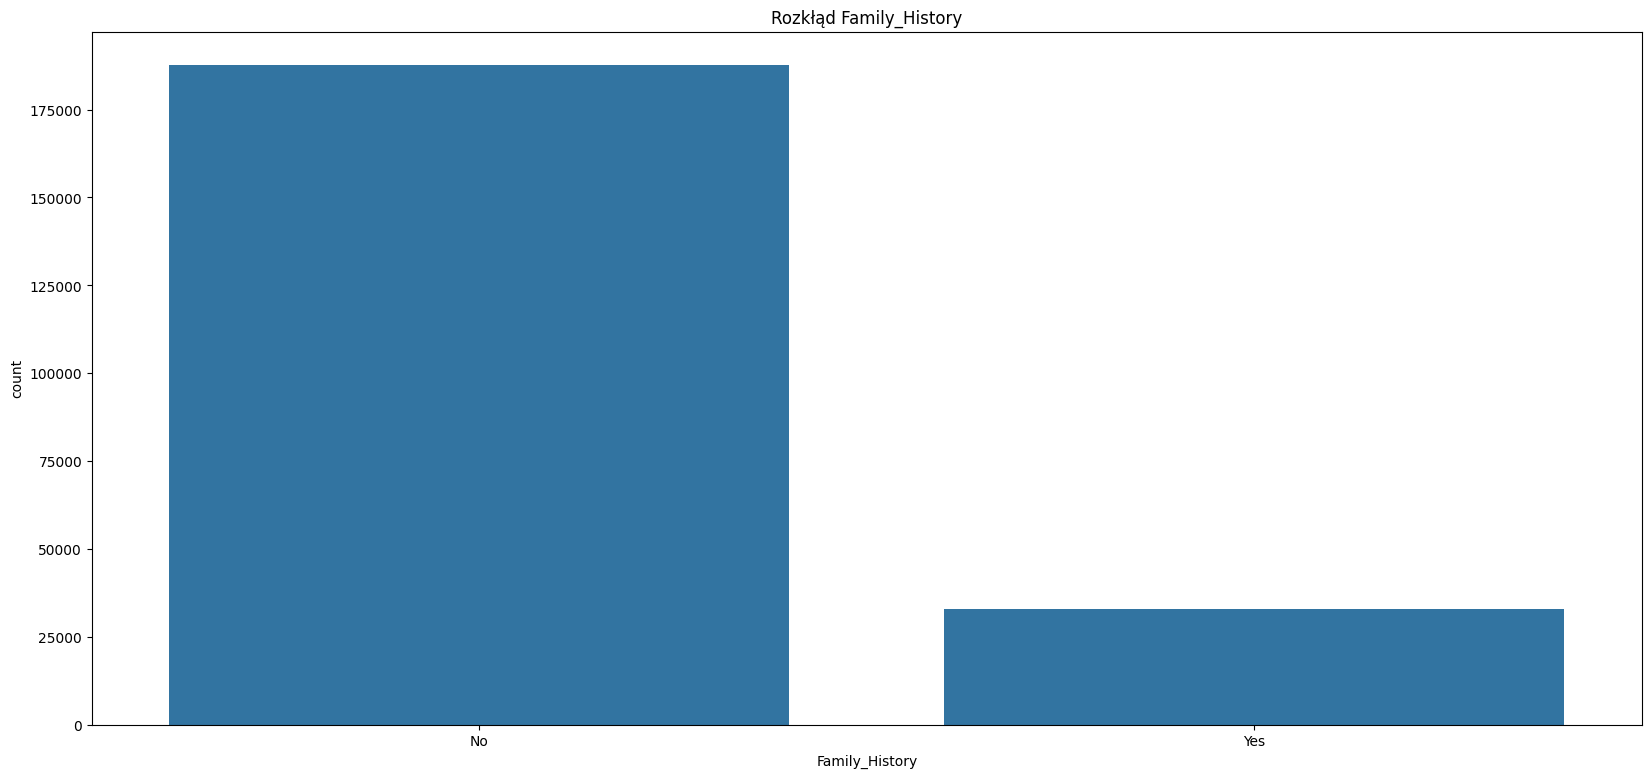

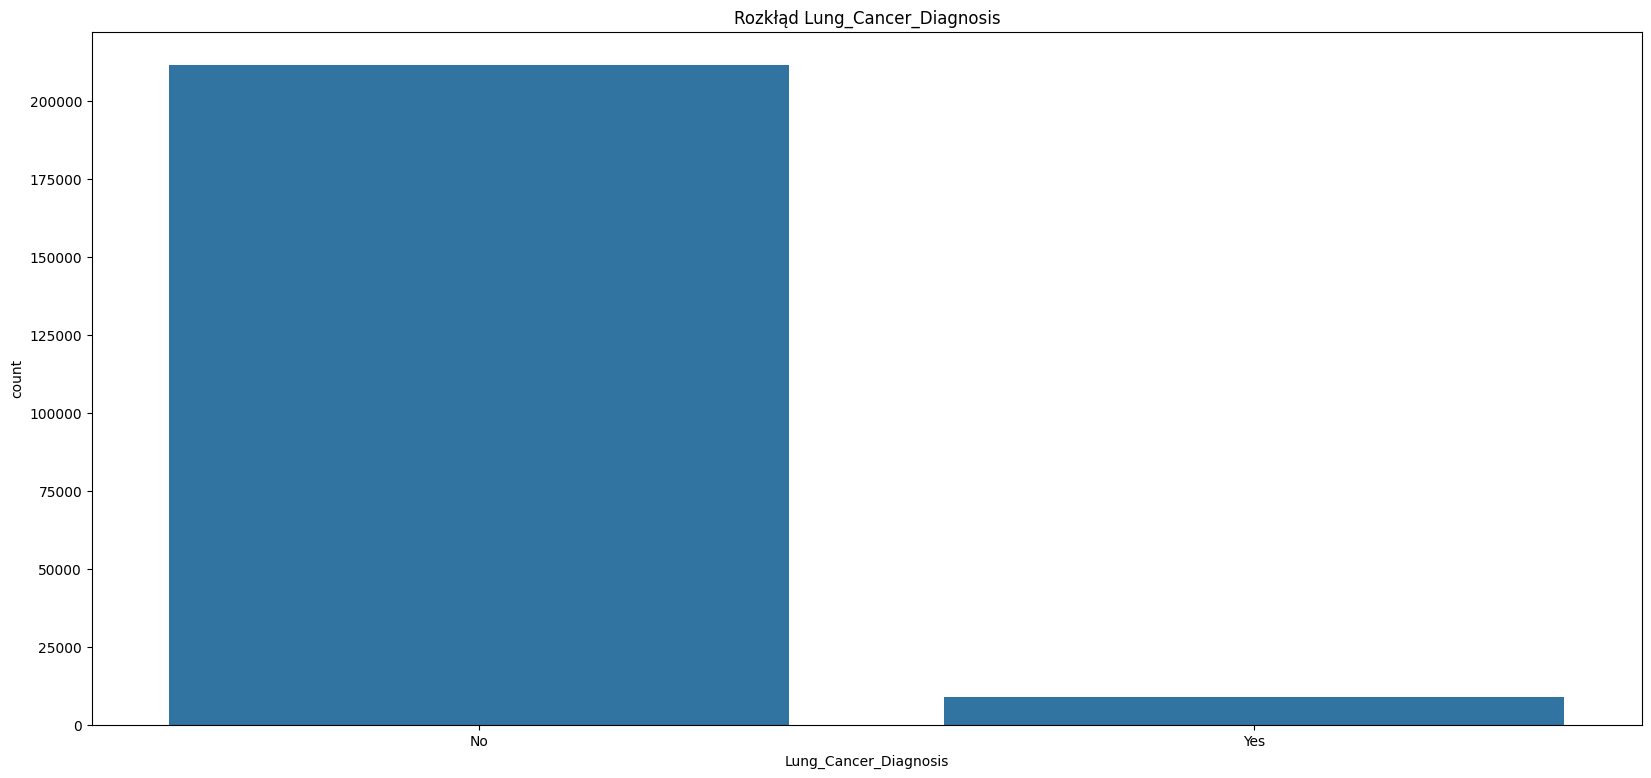

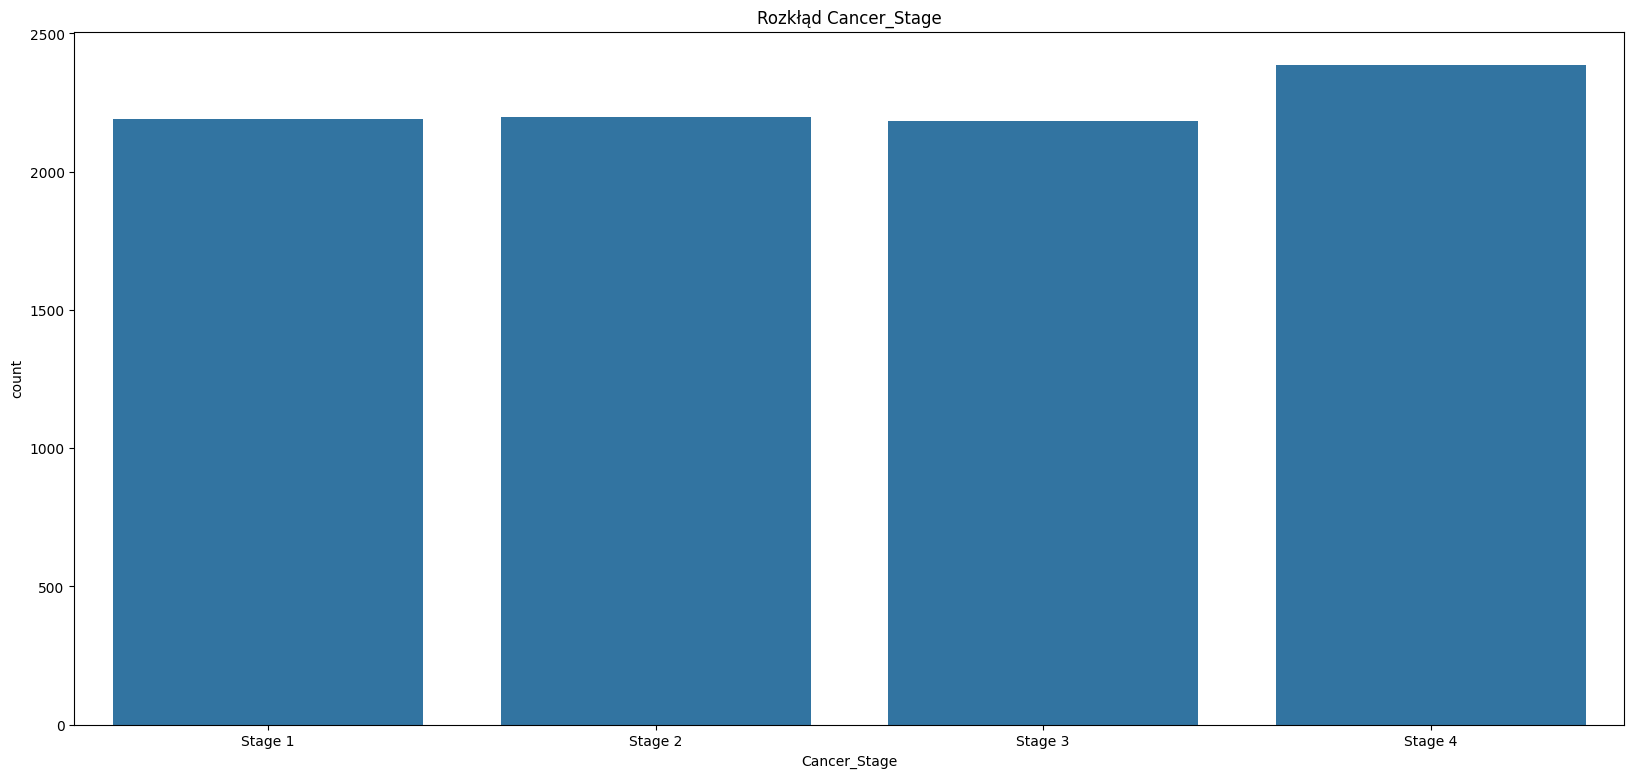

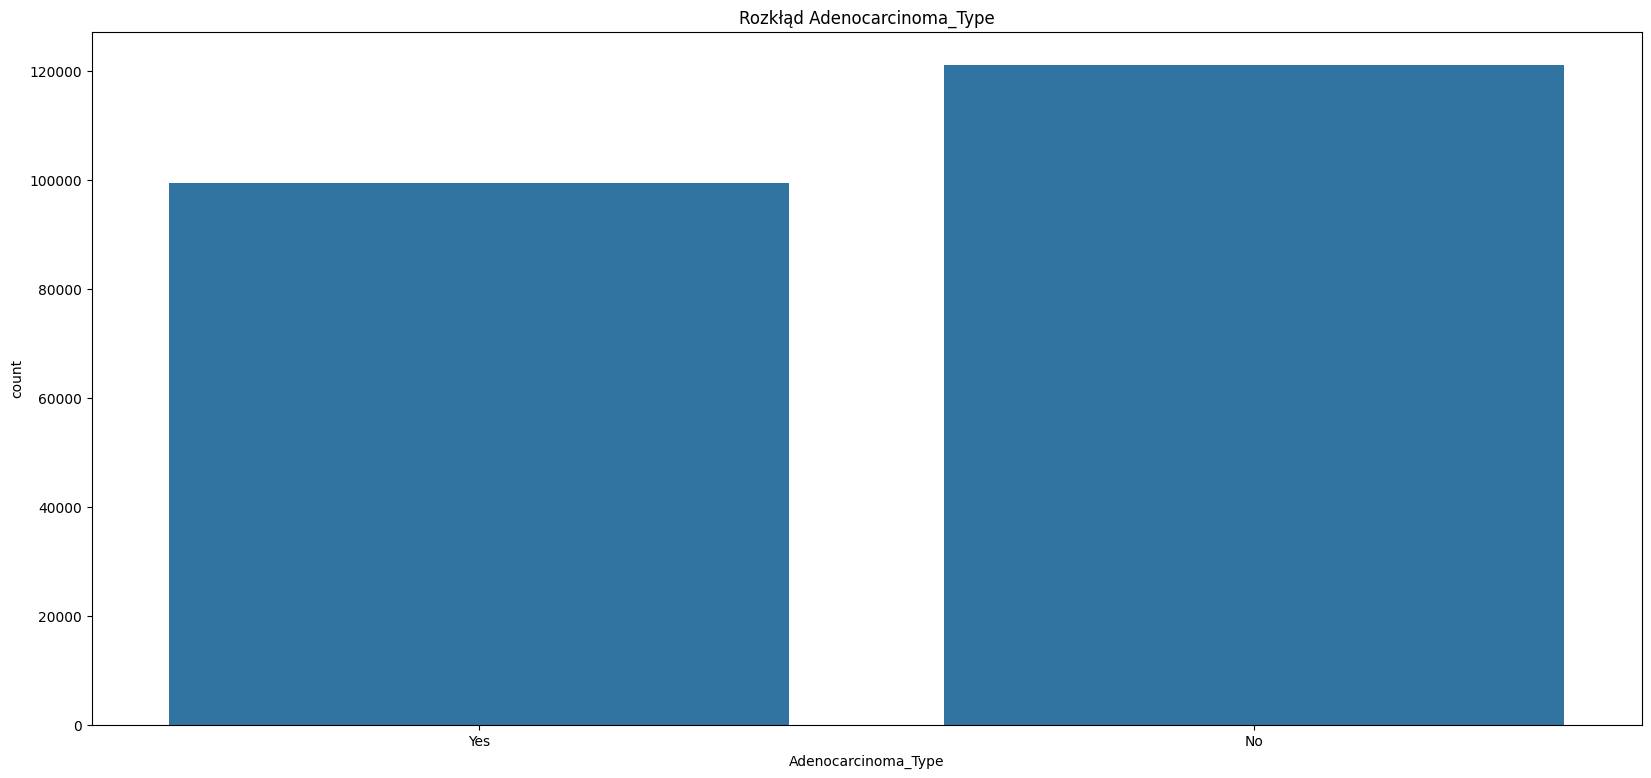

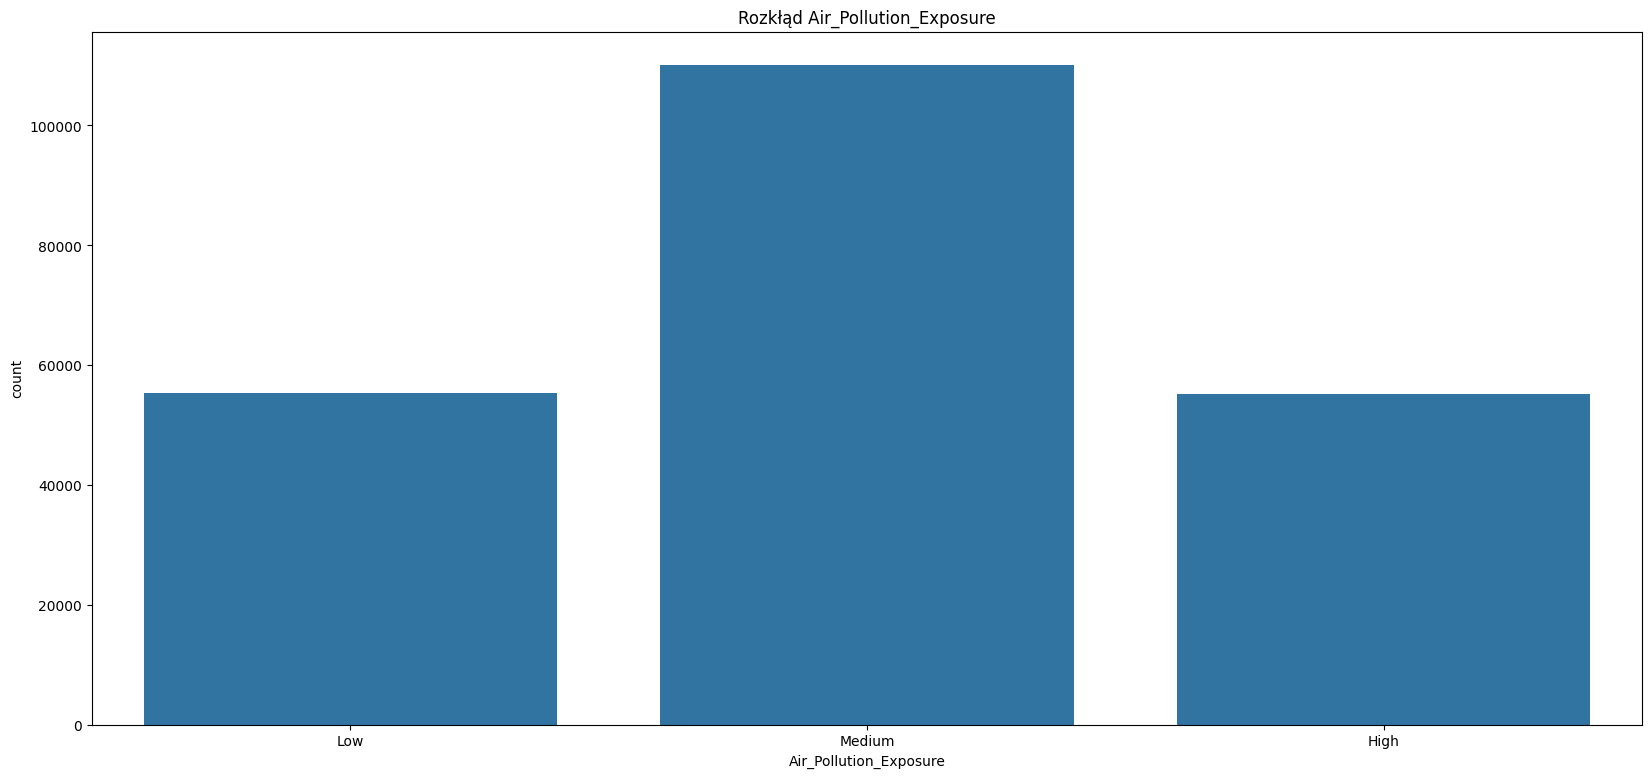

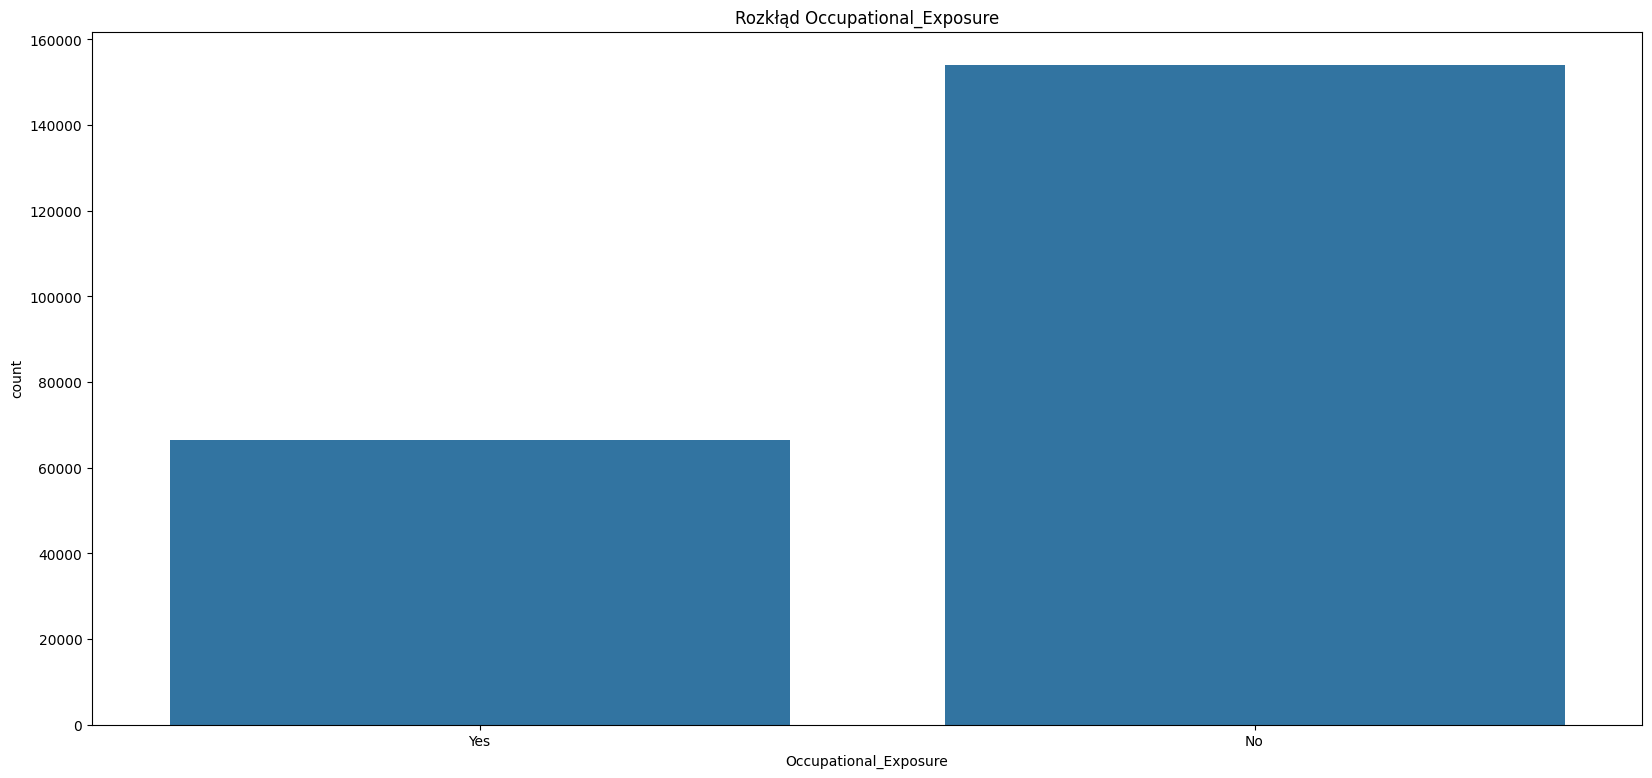

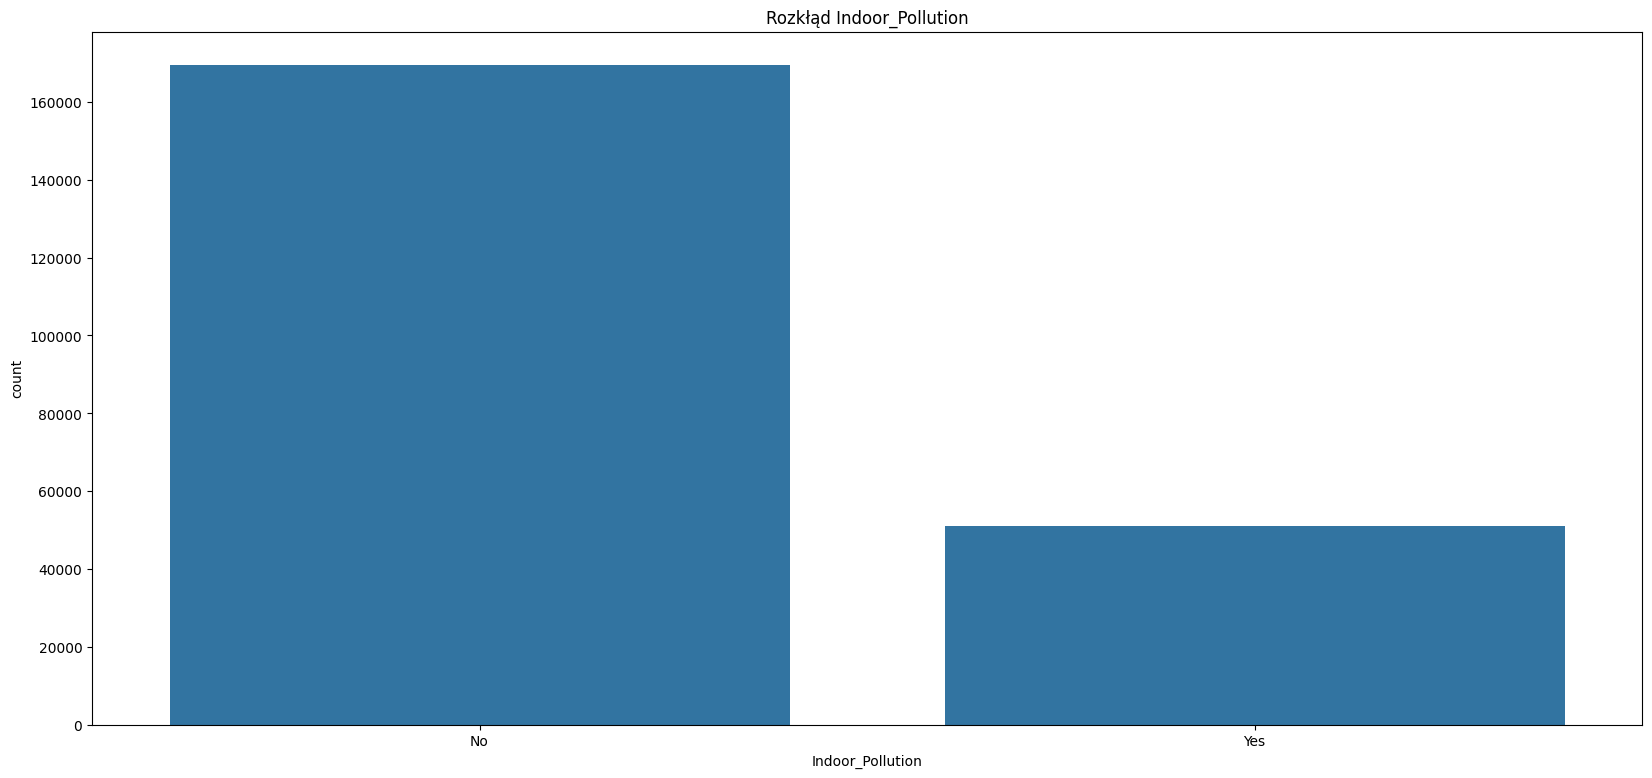

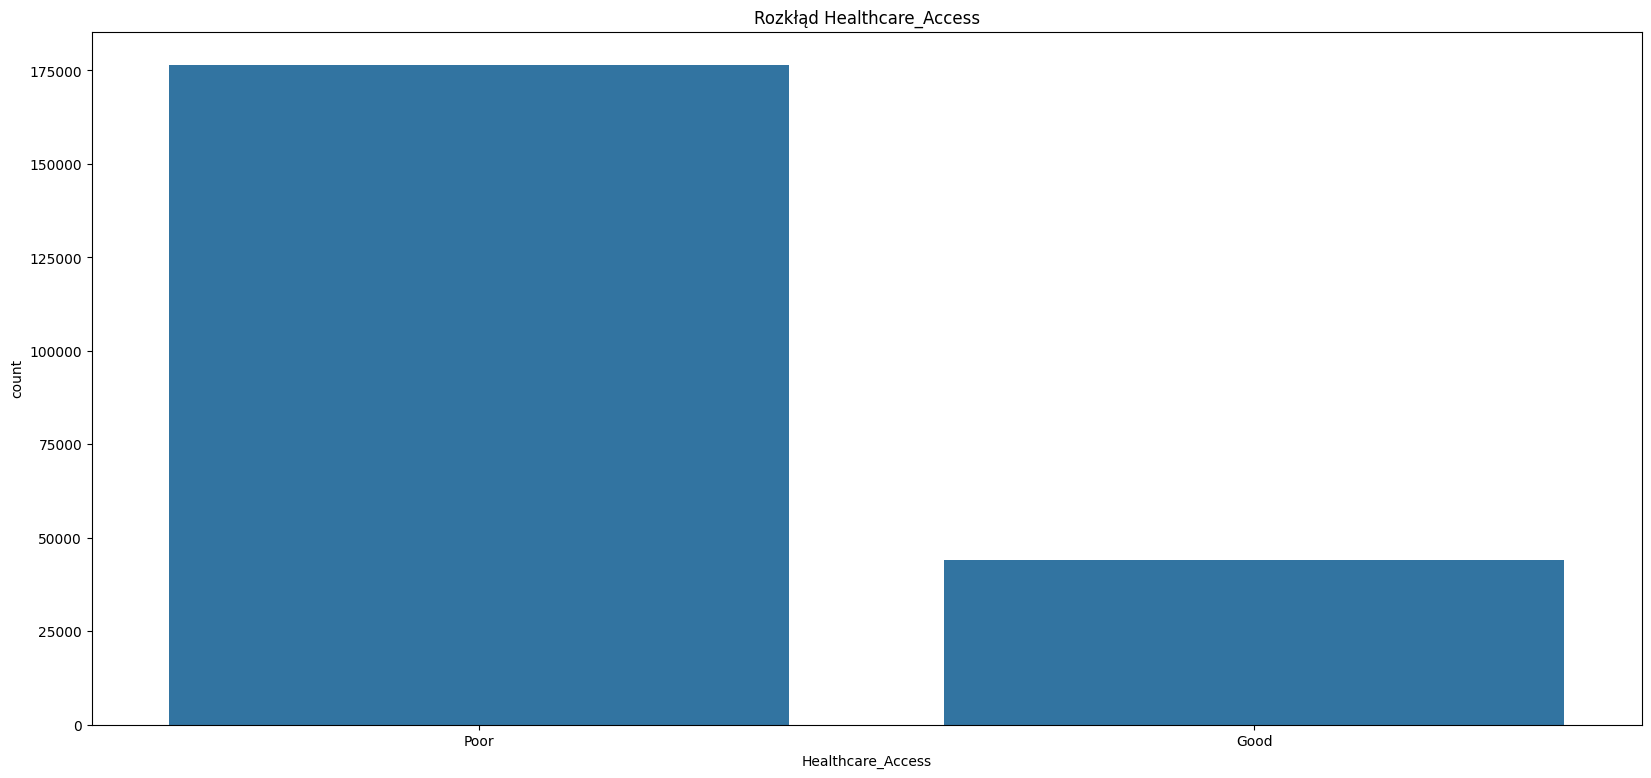

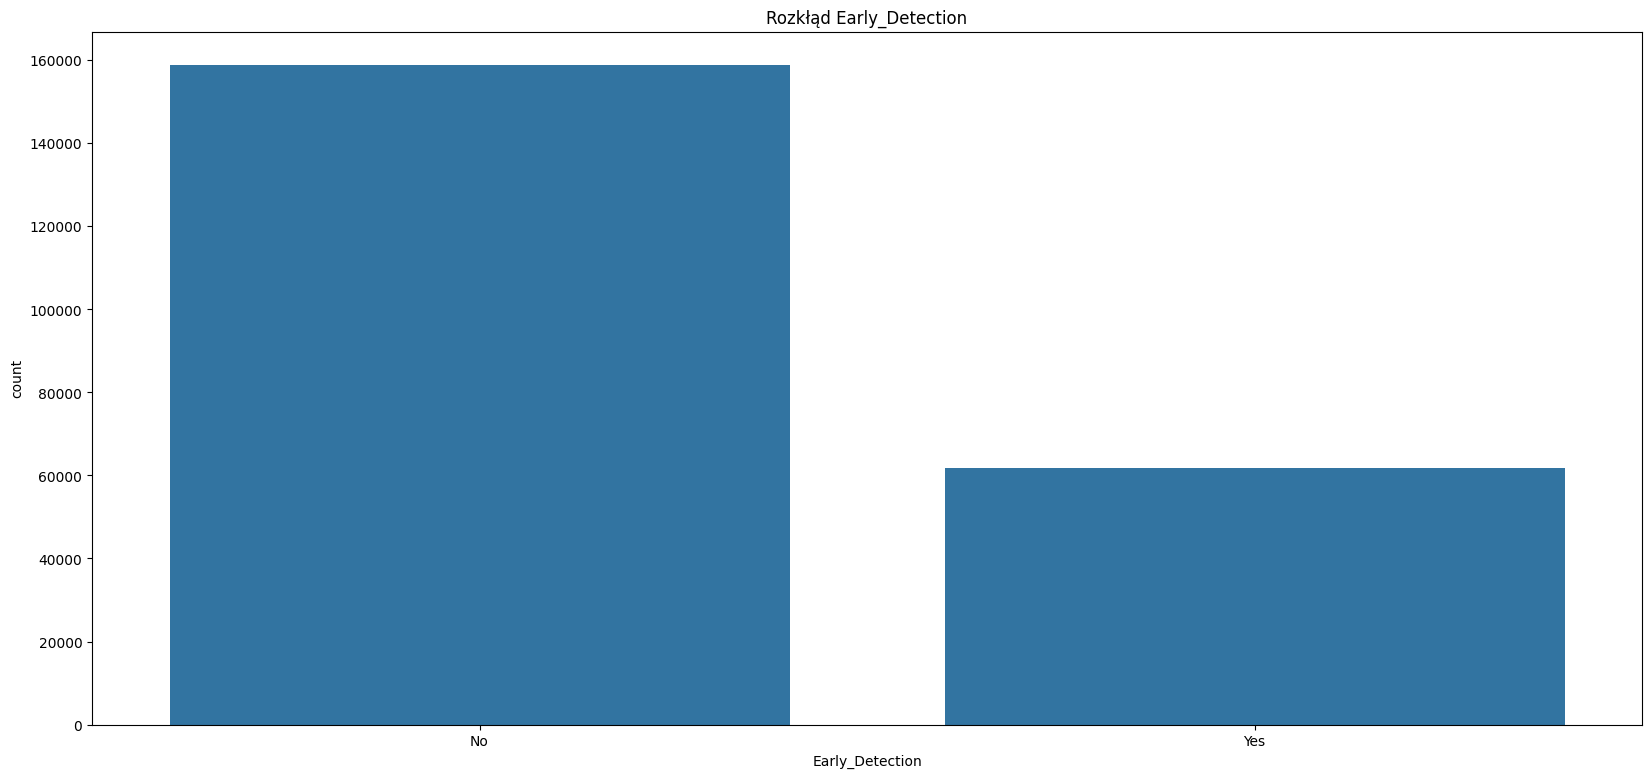

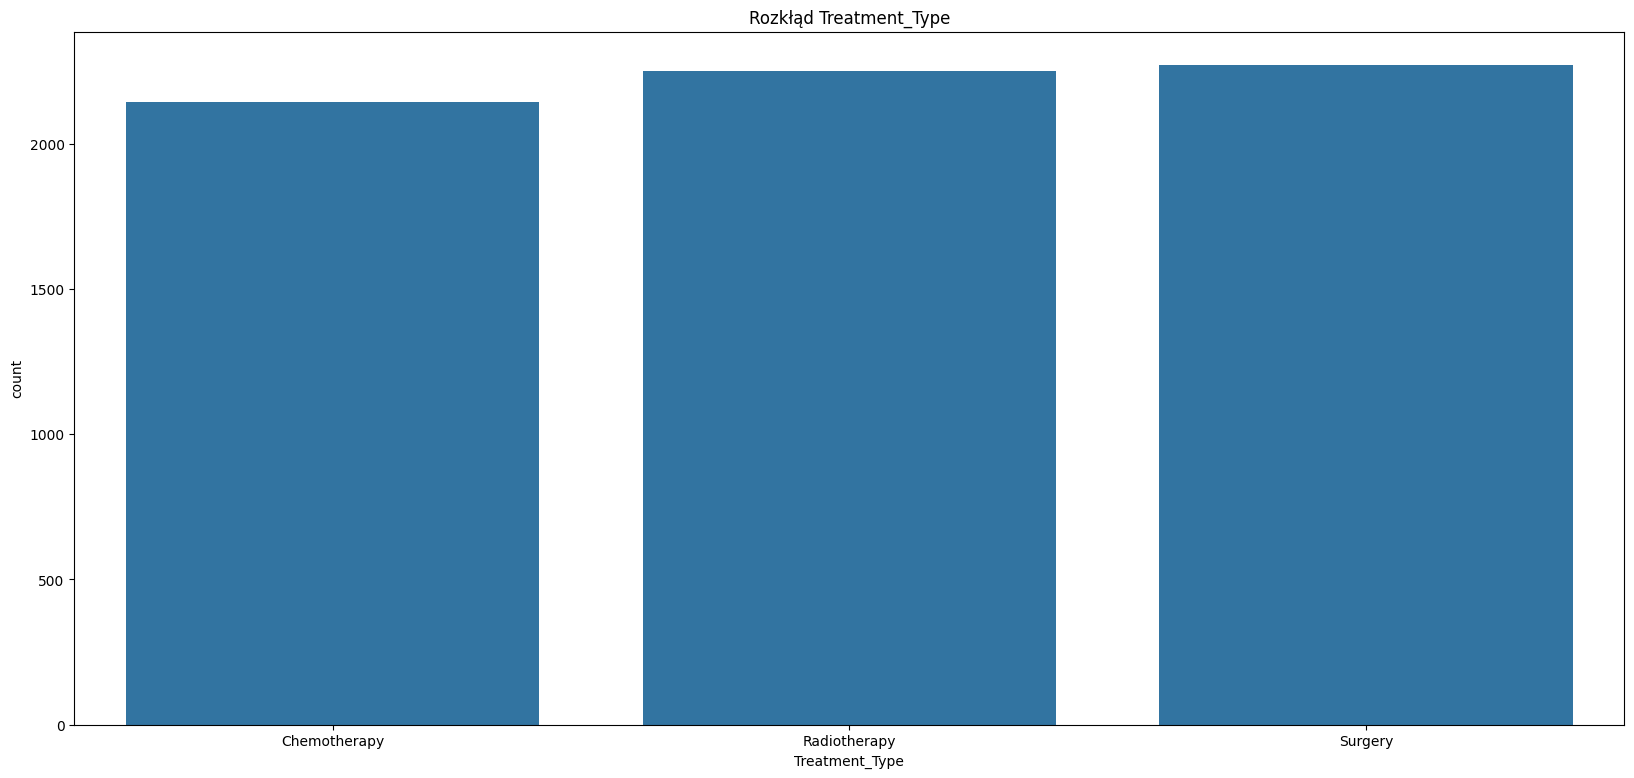

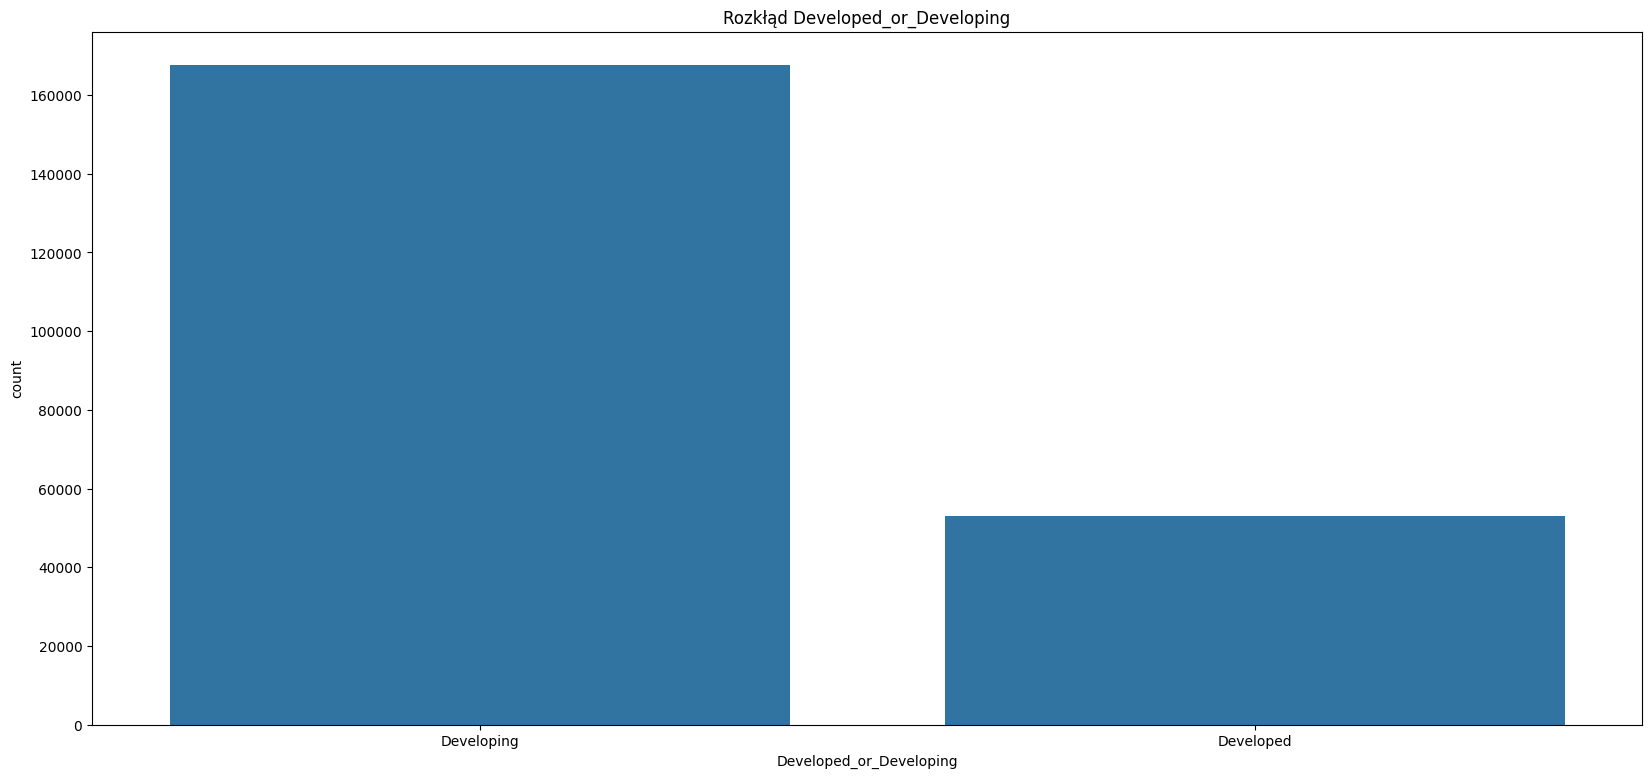

In [37]:
#Rozkłądy kategorycznych zmiennych
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(20,9))
    sns.countplot(data=df, x=col)
    plt.title(f"Rozkład {col}")
    plt.show()
    print("\n")

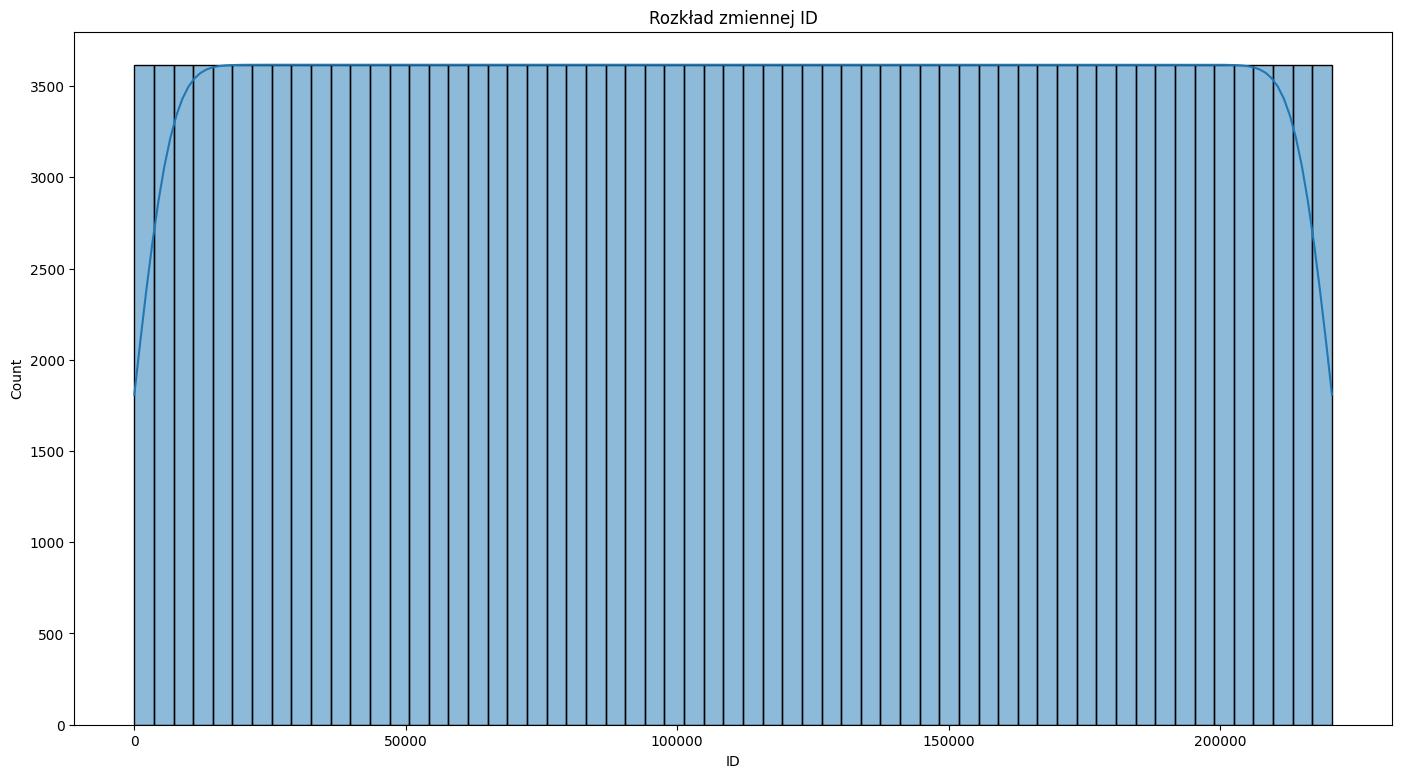

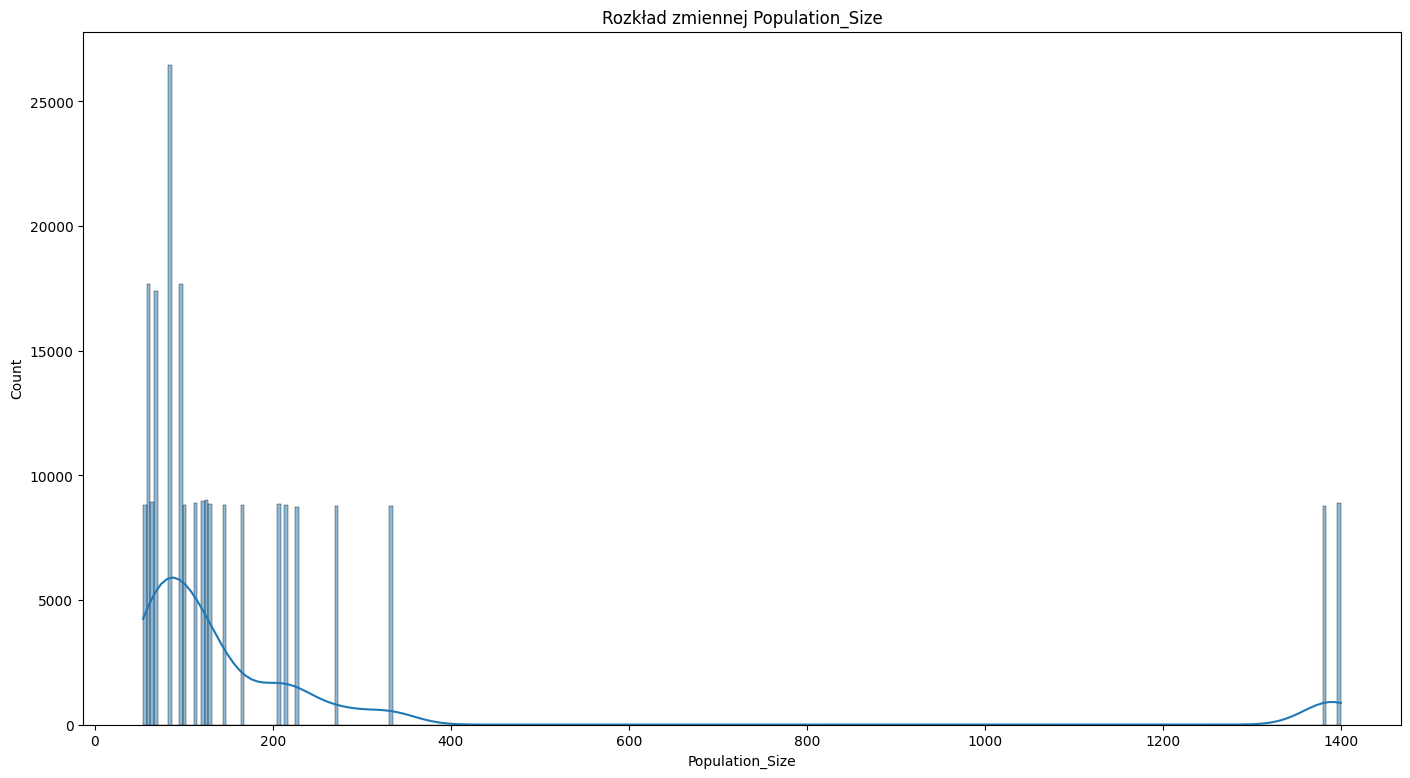

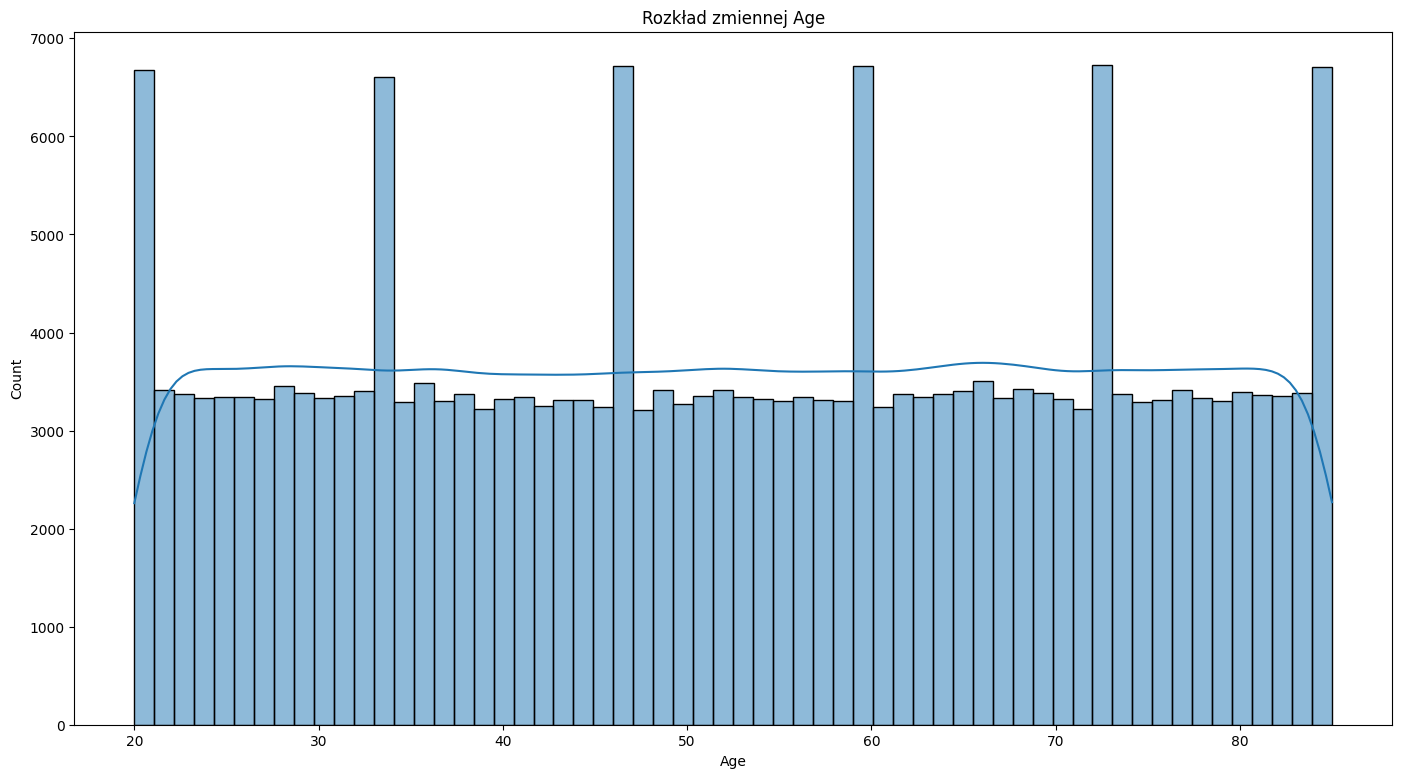

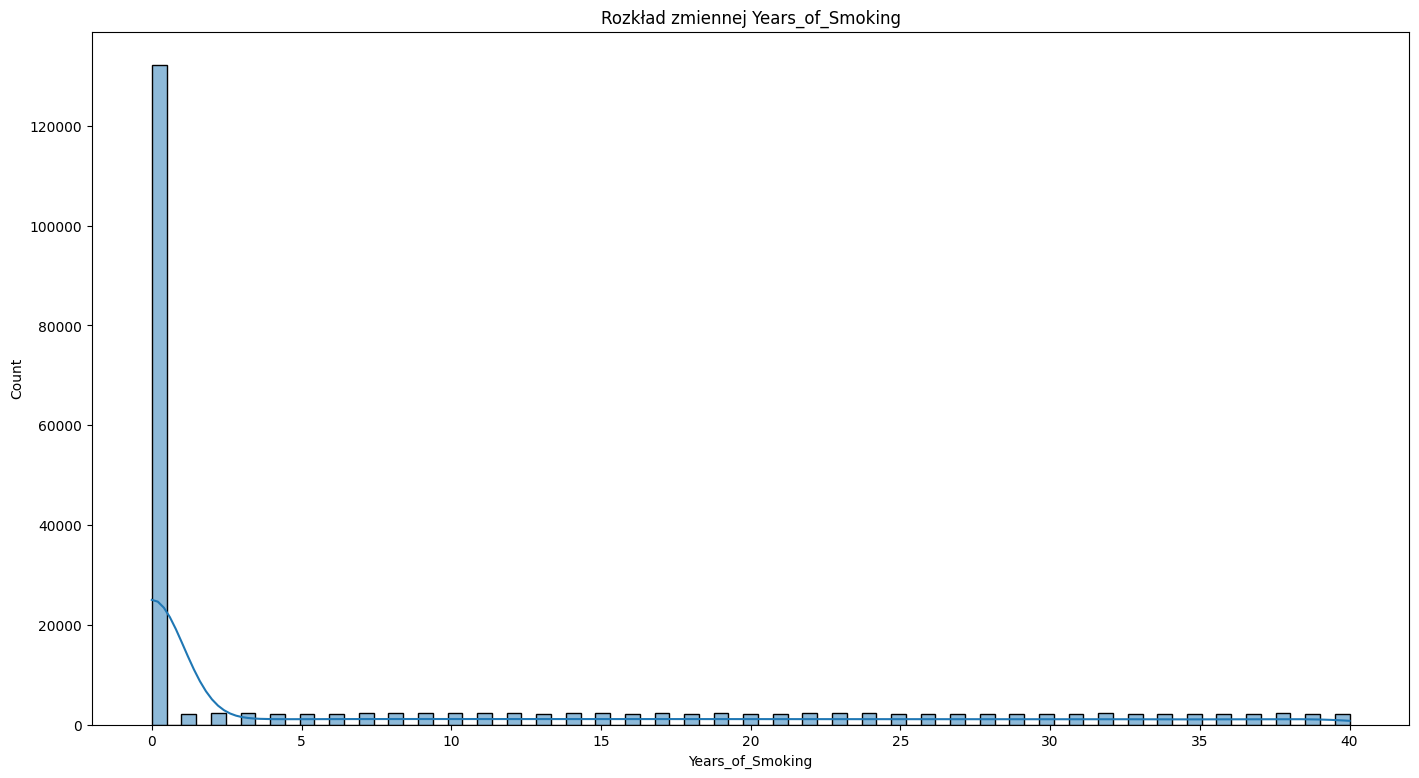

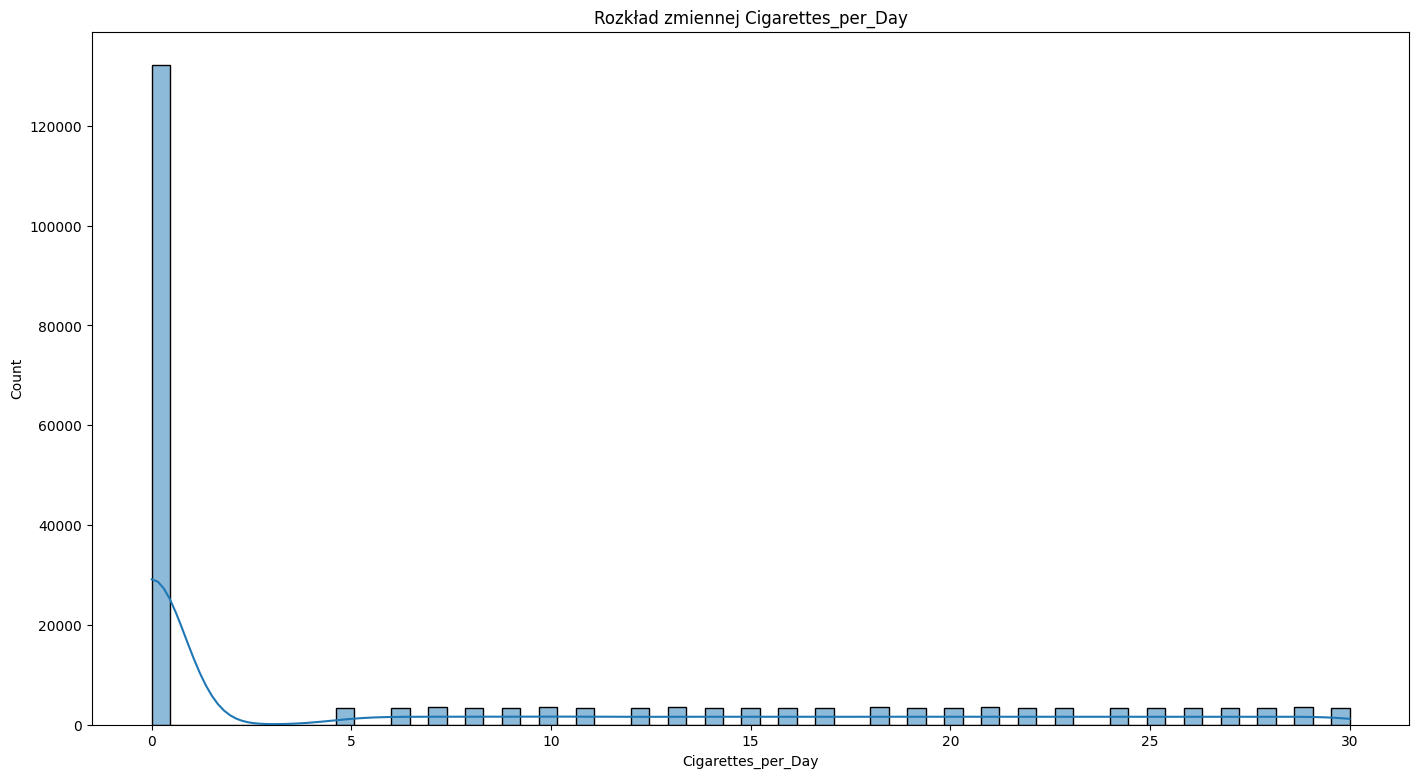

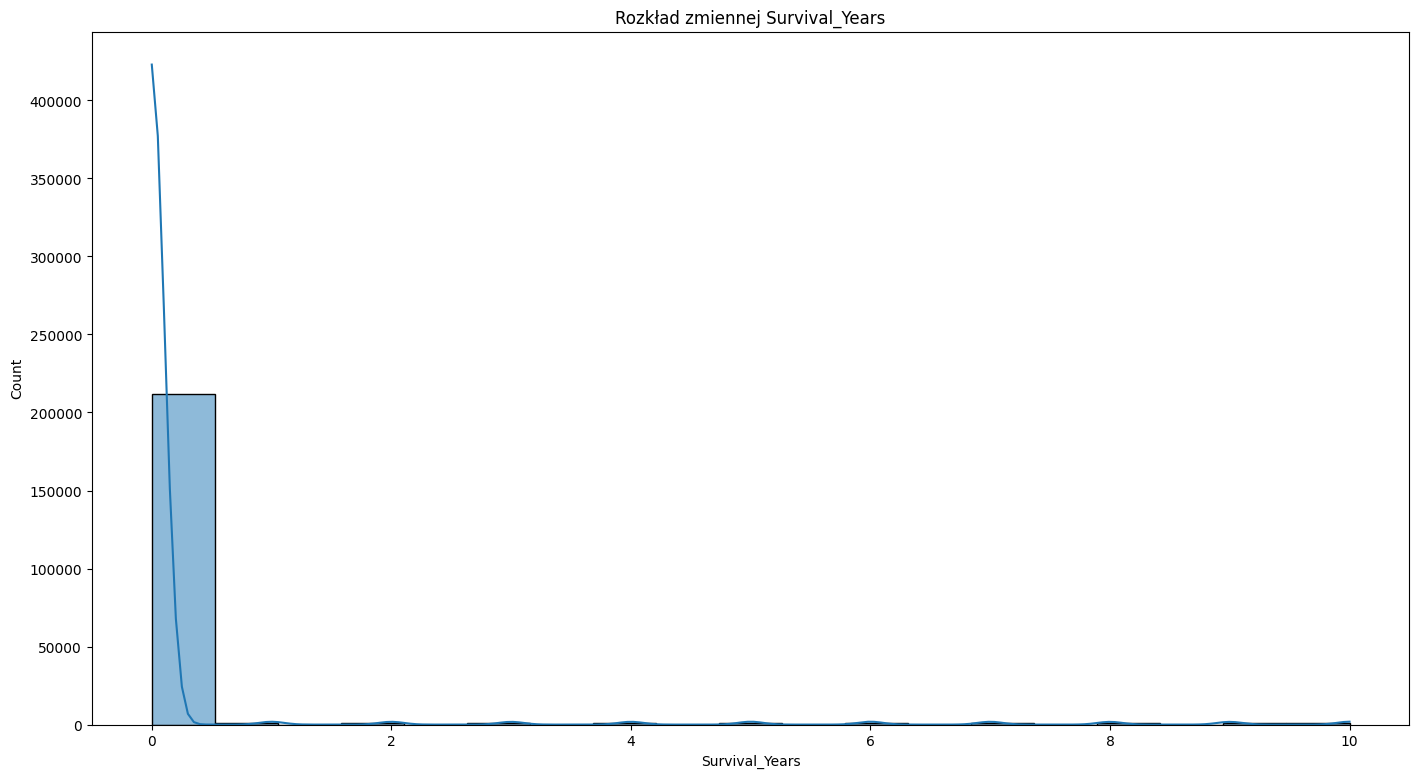

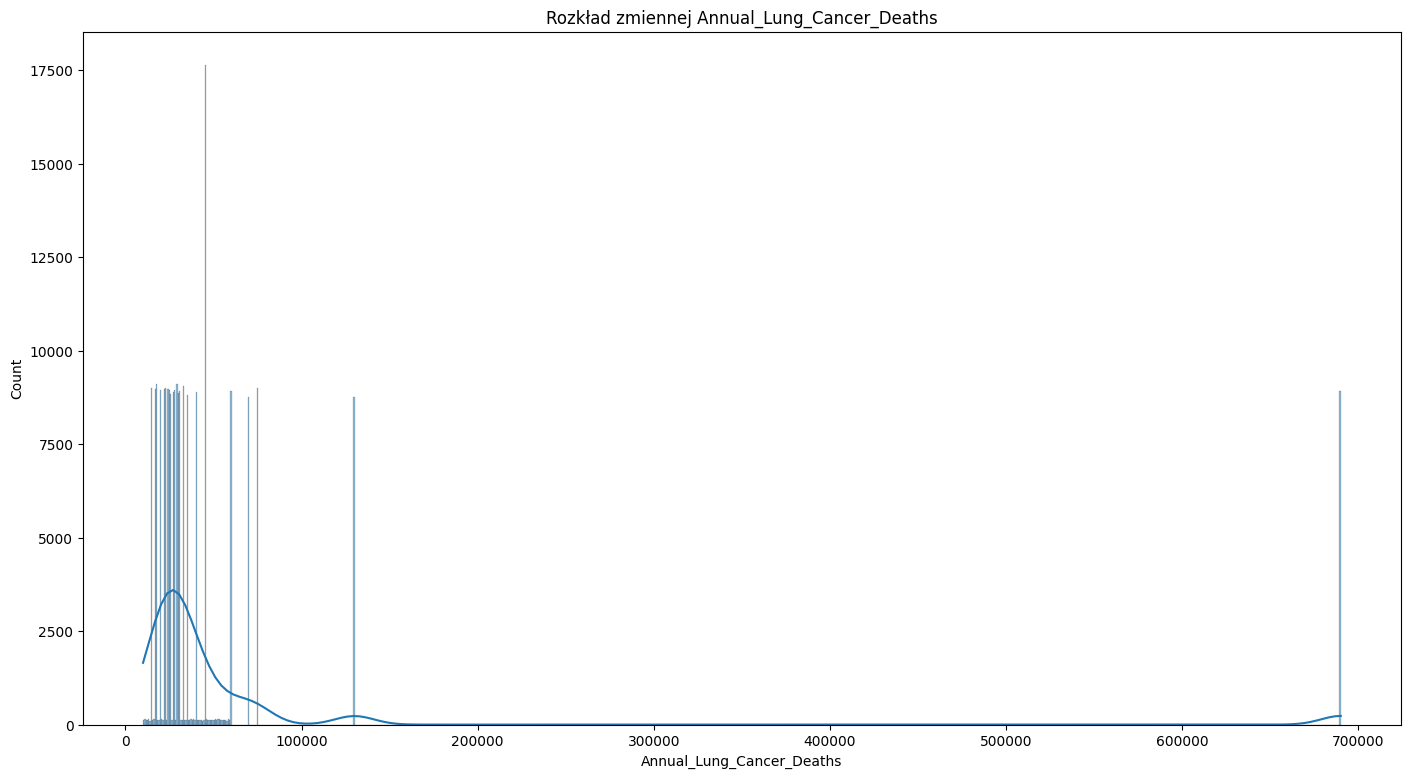

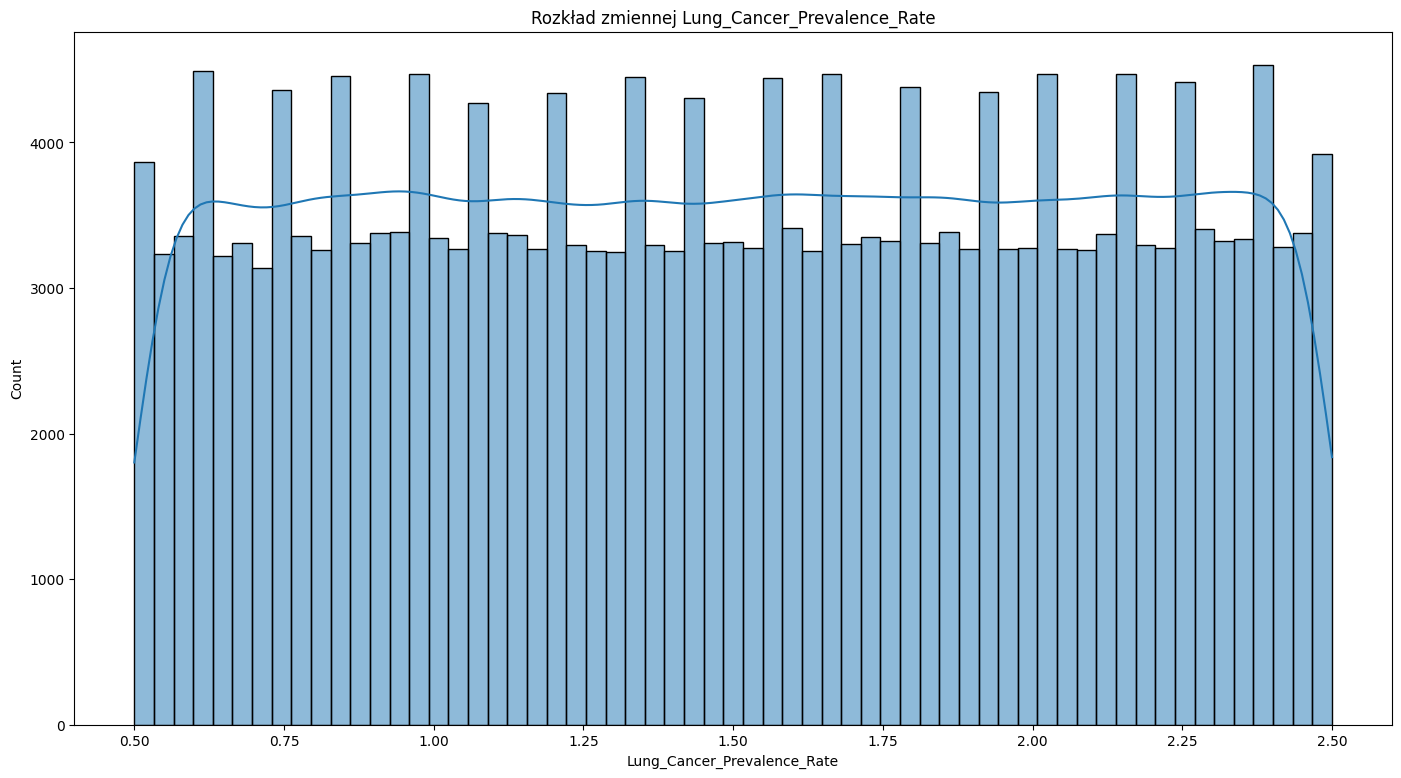

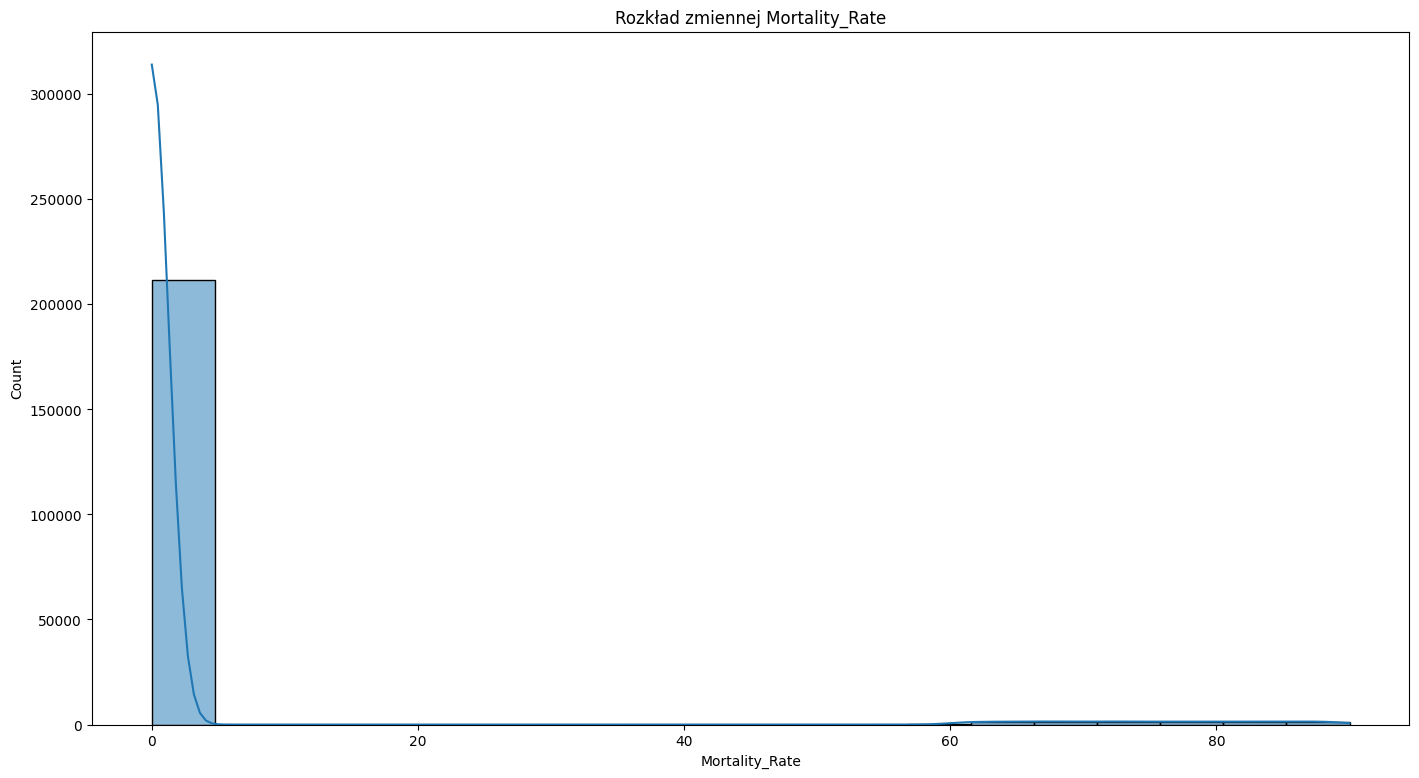

In [38]:
#Rozkłądy liczbowych zmiennych
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(17,9))
    sns.histplot(df[col], kde = True)
    plt.title(f"Rozkład zmiennej {col}")
    plt.show()
    print("\n")

In [39]:
print("\n Procent wartości null w każdej kolumnie: \n",
         (data.isna().sum()/len(data))*100)
print("\n Całkowita liczba zduplikowanych rekordów: ", data.duplicated().sum())


 Procent wartości null w każdej kolumnie: 
 ID                              0.000000
Country                         0.000000
Population_Size                 0.000000
Age                             0.000000
Gender                          0.000000
Smoker                          0.000000
Years_of_Smoking                0.000000
Cigarettes_per_Day              0.000000
Passive_Smoker                  0.000000
Family_History                  0.000000
Lung_Cancer_Diagnosis           0.000000
Cancer_Stage                   95.938486
Survival_Years                  0.000000
Adenocarcinoma_Type             0.000000
Air_Pollution_Exposure          0.000000
Occupational_Exposure           0.000000
Indoor_Pollution                0.000000
Healthcare_Access               0.000000
Early_Detection                 0.000000
Treatment_Type                 96.979586
Developed_or_Developing         0.000000
Annual_Lung_Cancer_Deaths       0.000000
Lung_Cancer_Prevalence_Rate     0.000000
Mortality_Ra

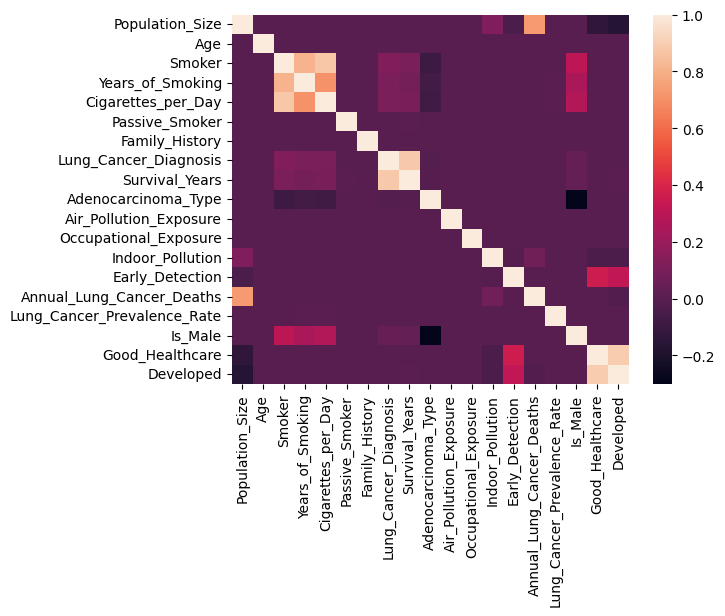

In [41]:
#Korelacja zmiennych
df["Is_Male"] = (df["Gender"] == "Male").astype(int)
df["Good_Healthcare"] = (df["Healthcare_Access"] == "Good").astype(int)
df["Developed"] = (df["Developed_or_Developing"]
                     == "Developed").astype(int)

df = df.replace({"Yes": 1, "No": 0, "Low": 0, "Medium": 1, "High": 2})

df = df.drop(columns=["Developed_or_Developing", "Healthcare_Access", "Gender", "ID"
                          ,"Country", "Cancer_Stage", "Treatment_Type", "Mortality_Rate"])
#"Cancer_Stage", "Early_Detection", "Treatment_Type", "Survival_Years", "Mortality_Rate"

corr = df.corr()
sns.heatmap(corr)
plt.show()


 Relacja między Lung Cancer i Population_Size
Population_Size          54    59    60    65    67    70    83    84    85  \
Lung_Cancer_Diagnosis                                                         
0                      8446  8497  8430  8555  8333  8370  8395  8452  8578   
1                       373   357   372   365   351   339   332   326   388   
All                    8819  8854  8802  8920  8684  8709  8727  8778  8966   

Population_Size          95  ...   145   166   206   213   225   273   331  \
Lung_Cancer_Diagnosis        ...                                             
0                      8497  ...  8464  8460  8452  8447  8377  8405  8392   
1                       364  ...   340   361   377   353   346   366   377   
All                    8861  ...  8804  8821  8829  8800  8723  8771  8769   

Population_Size        1380  1400     All  
Lung_Cancer_Diagnosis                      
0                      8417  8569  211671  
1                       335   338 

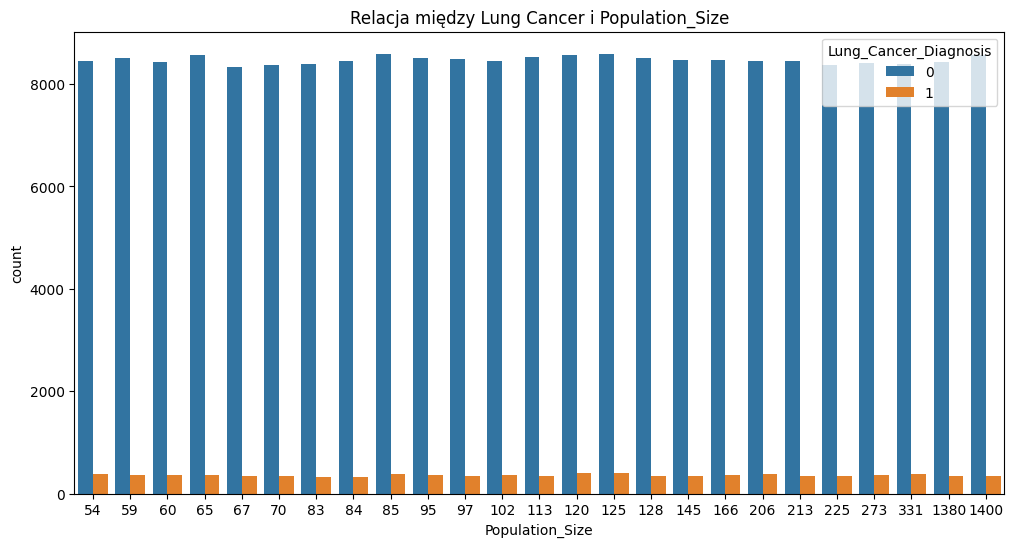




 Relacja między Lung Cancer i Age
Age                      20    21    22    23    24    25    26    27    28  \
Lung_Cancer_Diagnosis                                                         
0                      3145  3253  3292  3221  3205  3197  3193  3185  3334   
1                       139   139   125   148   127   145   149   133   125   
All                    3284  3392  3417  3369  3332  3342  3342  3318  3459   

Age                      29  ...    77    78    79    80    81    82    83  \
Lung_Cancer_Diagnosis        ...                                             
0                      3255  ...  3268  3192  3174  3265  3219  3200  3246   
1                       128  ...   141   135   130   128   140   148   141   
All                    3383  ...  3409  3327  3304  3393  3359  3348  3387   

Age                      84    85     All  
Lung_Cancer_Diagnosis                      
0                      3151  3280  211671  
1                       145   134    8961  


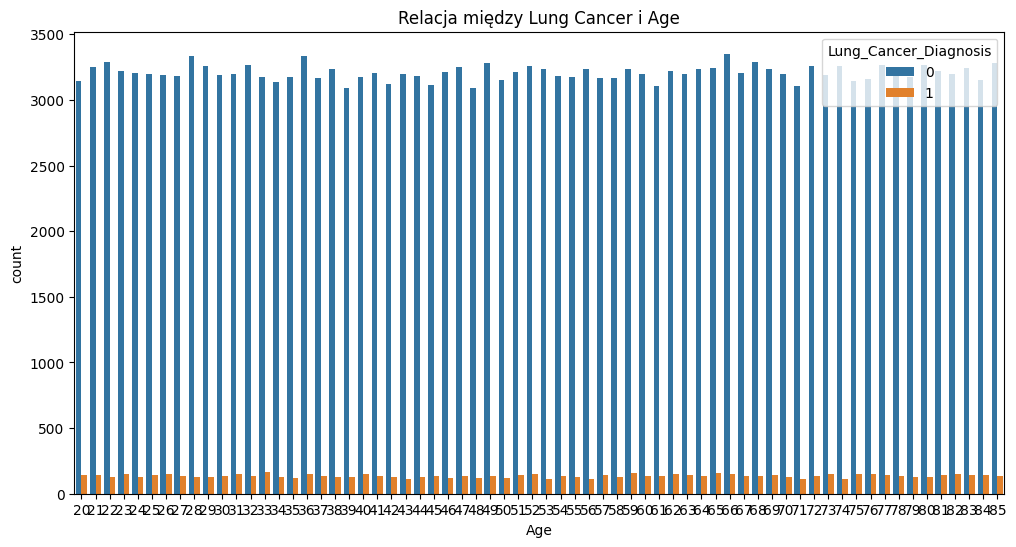




 Relacja między Lung Cancer i Smoker
Smoker                      0      1     All
Lung_Cancer_Diagnosis                       
0                      129579  82092  211671
1                        2712   6249    8961
All                    132291  88341  220632




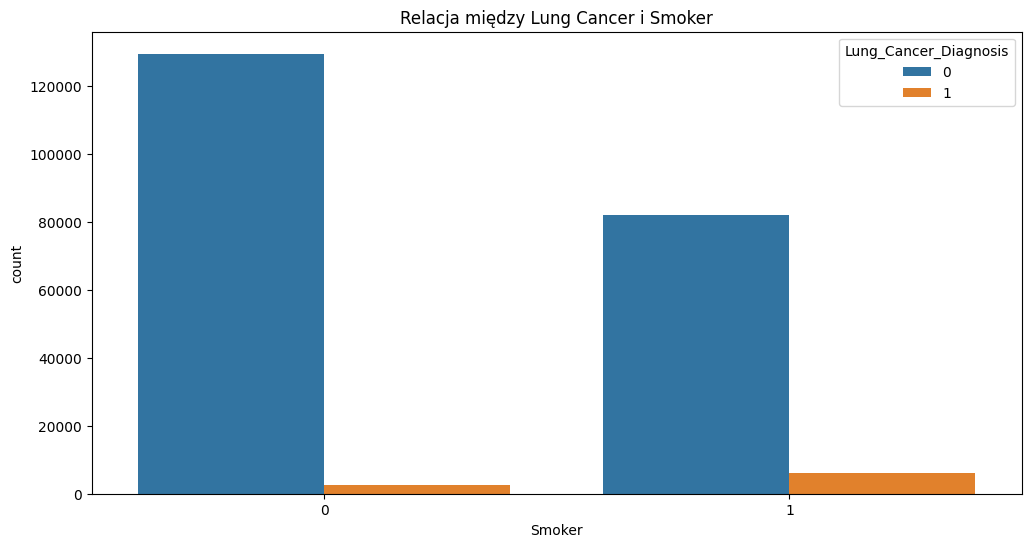




 Relacja między Lung Cancer i Years_of_Smoking
Years_of_Smoking            0     1     2     3     4     5     6     7     8  \
Lung_Cancer_Diagnosis                                                           
0                      129579  2003  2085  2059  1995  2041  2048  2120  2139   
1                        2712   142   163   164   143   154   158   147   141   
All                    132291  2145  2248  2223  2138  2195  2206  2267  2280   

Years_of_Smoking          9  ...    32    33    34    35    36    37    38  \
Lung_Cancer_Diagnosis        ...                                             
0                      2079  ...  2111  1979  1905  1976  2014  2063  2106   
1                       179  ...   144   155   165   148   154   157   146   
All                    2258  ...  2255  2134  2070  2124  2168  2220  2252   

Years_of_Smoking         39    40     All  
Lung_Cancer_Diagnosis                      
0                      2055  2039  211671  
1                    

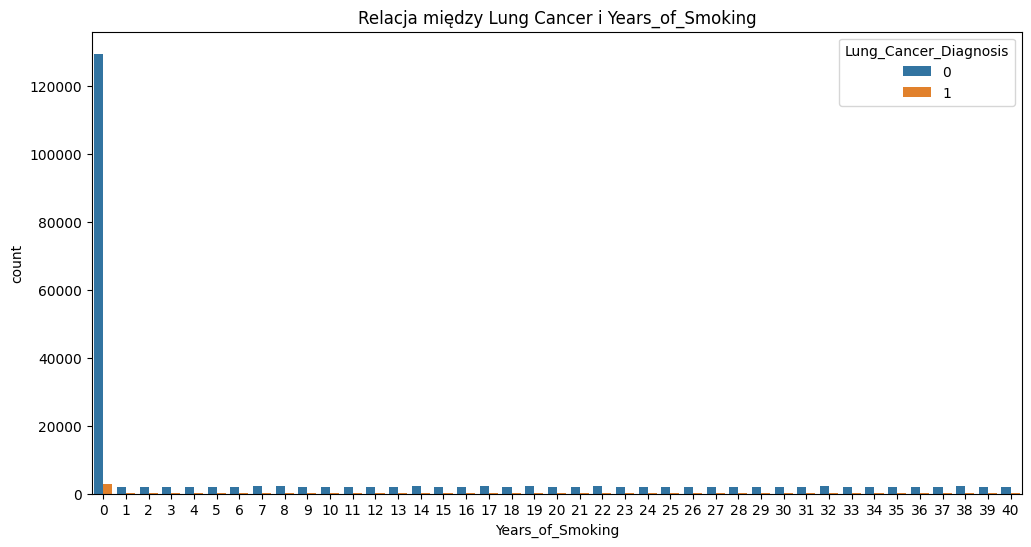




 Relacja między Lung Cancer i Cigarettes_per_Day
Cigarettes_per_Day          0     5     6     7     8     9    10    11    12  \
Lung_Cancer_Diagnosis                                                           
0                      129579  3137  3173  3223  3094  3127  3360  3082  3097   
1                        2712   231   218   232   266   257   237   225   227   
All                    132291  3368  3391  3455  3360  3384  3597  3307  3324   

Cigarettes_per_Day       13  ...    22    23    24    25    26    27    28  \
Lung_Cancer_Diagnosis        ...                                             
0                      3181  ...  3130  3173  3170  3161  3140  3141  3187   
1                       261  ...   239   225   233   239   261   250   232   
All                    3442  ...  3369  3398  3403  3400  3401  3391  3419   

Cigarettes_per_Day       29    30     All  
Lung_Cancer_Diagnosis                      
0                      3221  3129  211671  
1                  

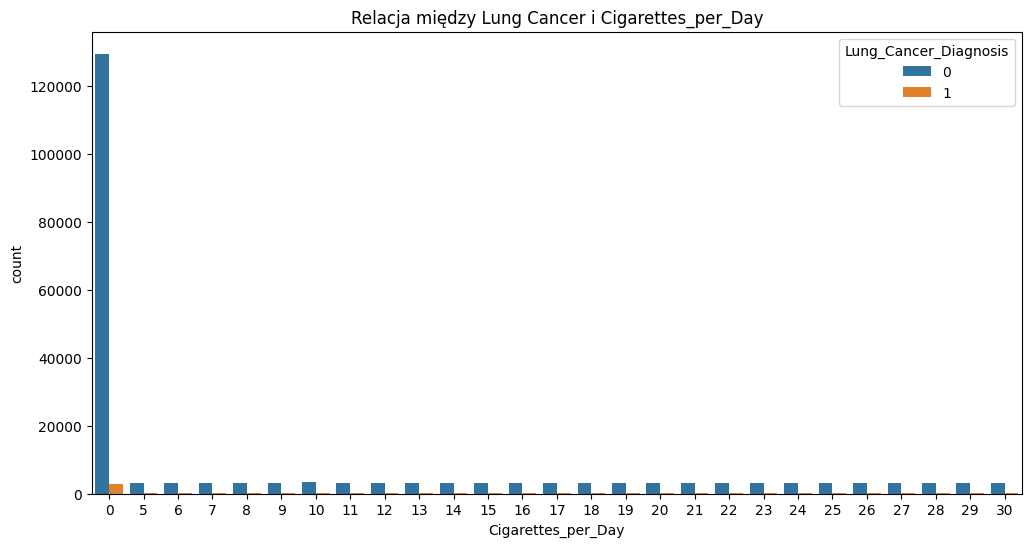




 Relacja między Lung Cancer i Passive_Smoker
Passive_Smoker              0      1     All
Lung_Cancer_Diagnosis                       
0                      148444  63227  211671
1                        6226   2735    8961
All                    154670  65962  220632




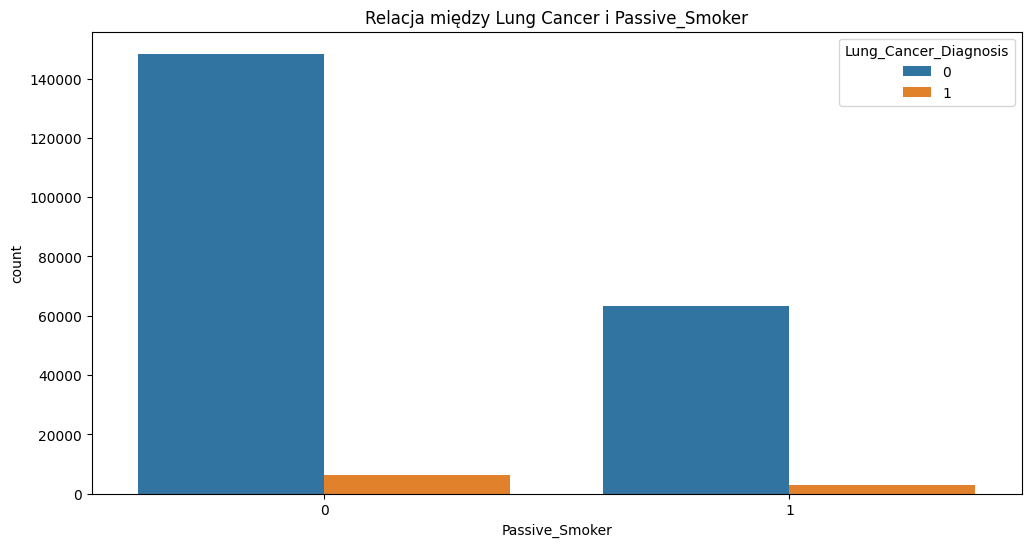




 Relacja między Lung Cancer i Family_History
Family_History              0      1     All
Lung_Cancer_Diagnosis                       
0                      180148  31523  211671
1                        7659   1302    8961
All                    187807  32825  220632




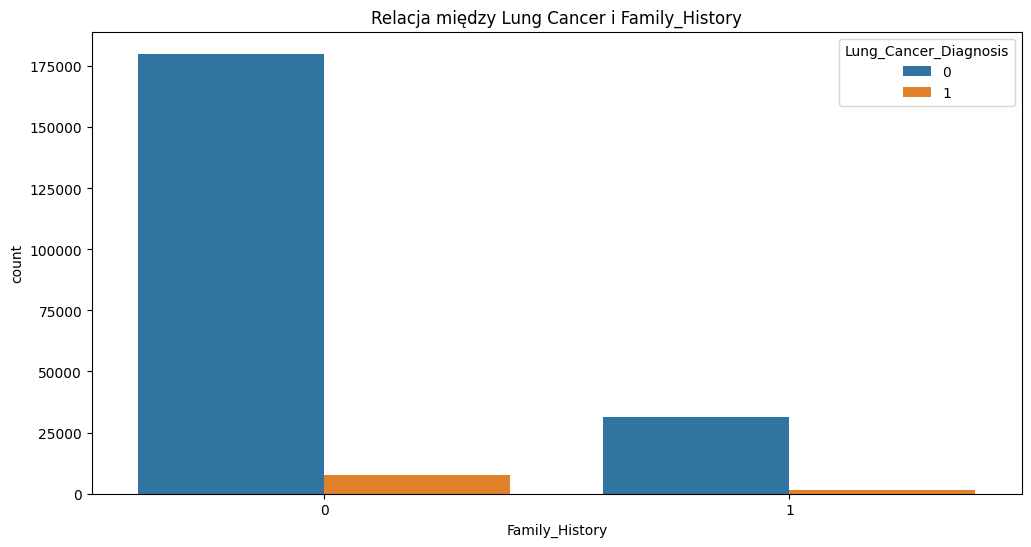




 Relacja między Lung Cancer i Survival_Years
Survival_Years              0    1    2    3    4    5    6    7    8    9  \
Lung_Cancer_Diagnosis                                                        
0                      211671    0    0    0    0    0    0    0    0    0   
1                           0  905  888  873  888  922  924  896  871  869   
All                    211671  905  888  873  888  922  924  896  871  869   

Survival_Years          10     All  
Lung_Cancer_Diagnosis               
0                        0  211671  
1                      925    8961  
All                    925  220632  




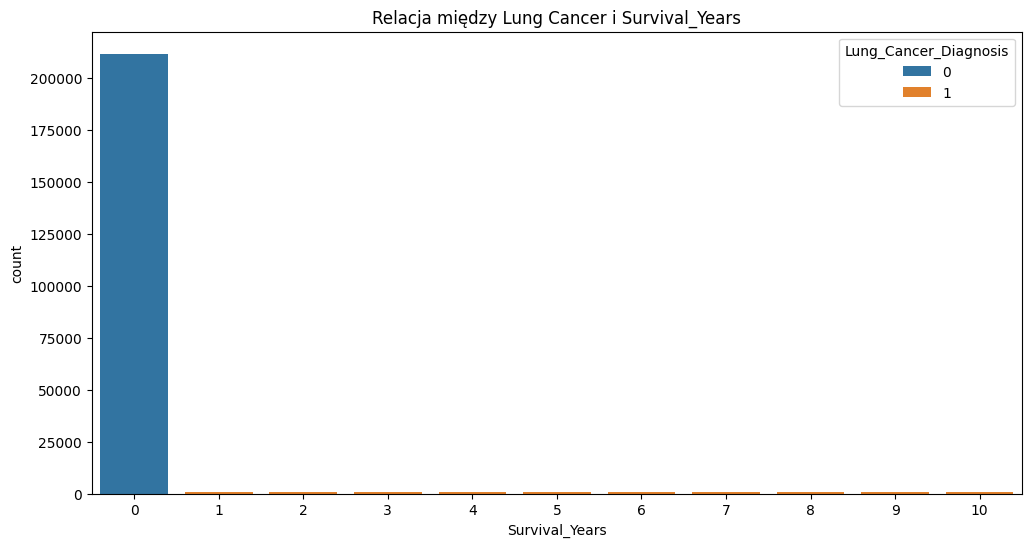




 Relacja między Lung Cancer i Adenocarcinoma_Type
Adenocarcinoma_Type         0      1     All
Lung_Cancer_Diagnosis                       
0                      115960  95711  211671
1                        5179   3782    8961
All                    121139  99493  220632




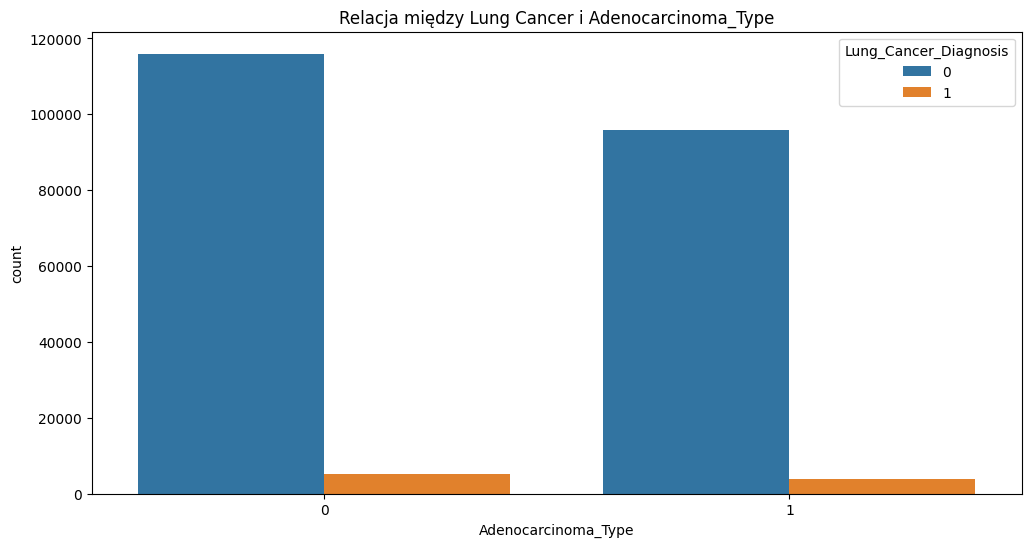




 Relacja między Lung Cancer i Air_Pollution_Exposure
Air_Pollution_Exposure      0       1      2     All
Lung_Cancer_Diagnosis                               
0                       53143  105659  52869  211671
1                        2224    4498   2239    8961
All                     55367  110157  55108  220632




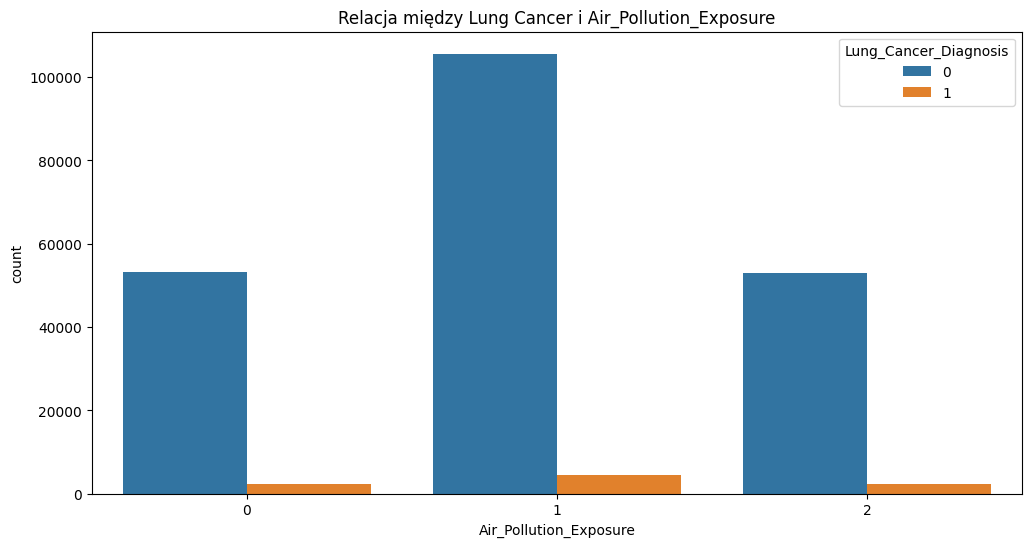




 Relacja między Lung Cancer i Occupational_Exposure
Occupational_Exposure       0      1     All
Lung_Cancer_Diagnosis                       
0                      147920  63751  211671
1                        6195   2766    8961
All                    154115  66517  220632




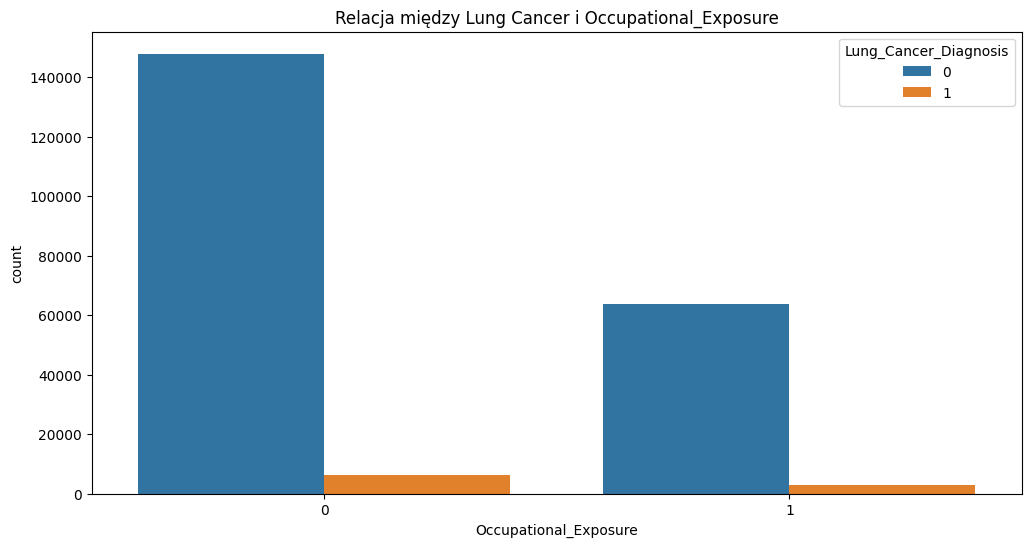




 Relacja między Lung Cancer i Indoor_Pollution
Indoor_Pollution            0      1     All
Lung_Cancer_Diagnosis                       
0                      162689  48982  211671
1                        6930   2031    8961
All                    169619  51013  220632




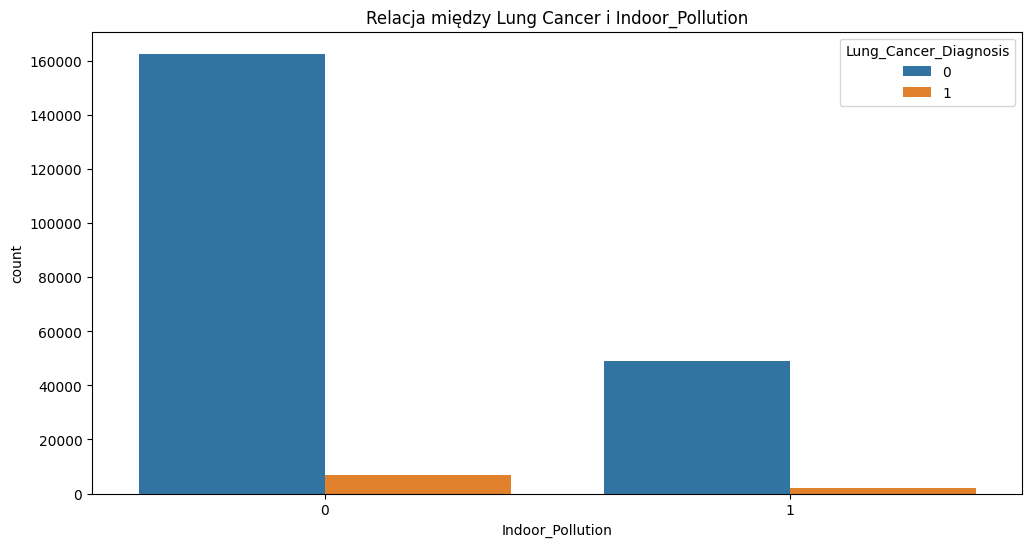




 Relacja między Lung Cancer i Early_Detection
Early_Detection             0      1     All
Lung_Cancer_Diagnosis                       
0                      152494  59177  211671
1                        6419   2542    8961
All                    158913  61719  220632




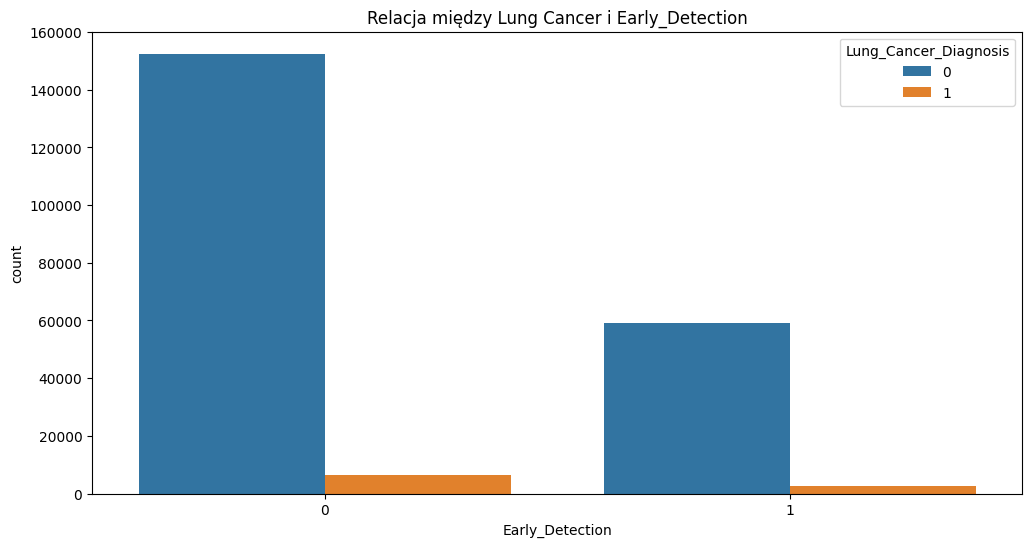




 Relacja między Lung Cancer i Annual_Lung_Cancer_Deaths
Annual_Lung_Cancer_Deaths  10005  10007  10019  10026  10028  10040  10041  \
Lung_Cancer_Diagnosis                                                        
0                              1      1      1      1      1      1      1   
1                              0      0      0      0      0      0      0   
All                            1      1      1      1      1      1      1   

Annual_Lung_Cancer_Deaths  10044  10047  10054  ...  59980  59986  59989  \
Lung_Cancer_Diagnosis                           ...                        
0                              0      1      1  ...      1      1      1   
1                              1      0      0  ...      0      0      0   
All                            1      1      1  ...      1      1      1   

Annual_Lung_Cancer_Deaths  59999  60000  70000  75000  130000  690000     All  
Lung_Cancer_Diagnosis                                                          
0        

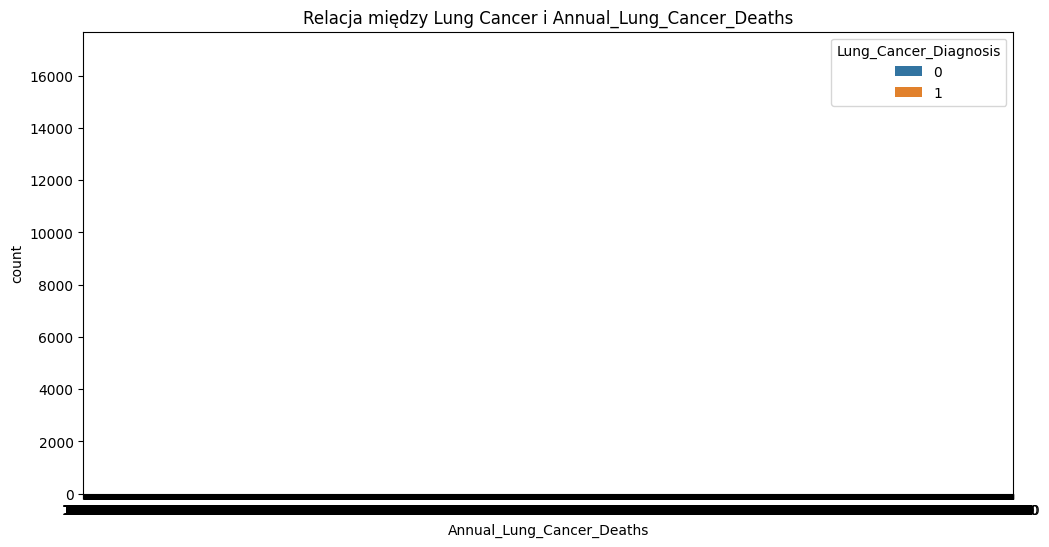




 Relacja między Lung Cancer i Lung_Cancer_Prevalence_Rate
Lung_Cancer_Prevalence_Rate  0.5  0.51  0.52  0.53  0.54  0.55  0.56  0.57  \
Lung_Cancer_Diagnosis                                                        
0                            520  1061  1040  1079  1028  1042  1036  1044   
1                             15    40    62    52    42    44    40    35   
All                          535  1101  1102  1131  1070  1086  1076  1079   

Lung_Cancer_Prevalence_Rate  0.58  0.59  ...  2.42  2.43  2.44  2.45  2.46  \
Lung_Cancer_Diagnosis                    ...                                 
0                            1121  1062  ...  1046  1045  1044  1113  1114   
1                              53    40  ...    43    42    35    42    33   
All                          1174  1102  ...  1089  1087  1079  1155  1147   

Lung_Cancer_Prevalence_Rate  2.47  2.48  2.49  2.5     All  
Lung_Cancer_Diagnosis                                       
0                            1076  

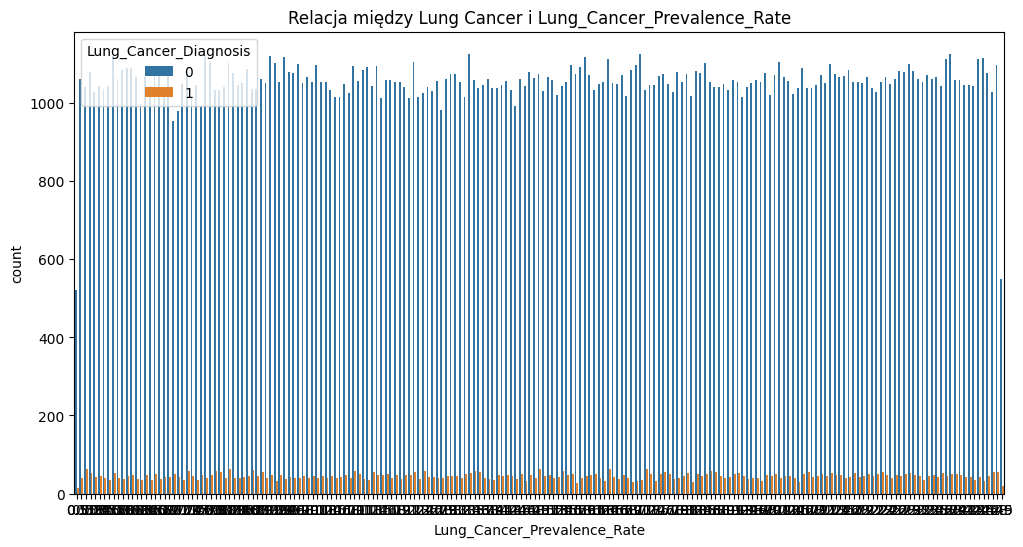




 Relacja między Lung Cancer i Is_Male
Is_Male                     0       1     All
Lung_Cancer_Diagnosis                        
0                      106859  104812  211671
1                        3629    5332    8961
All                    110488  110144  220632




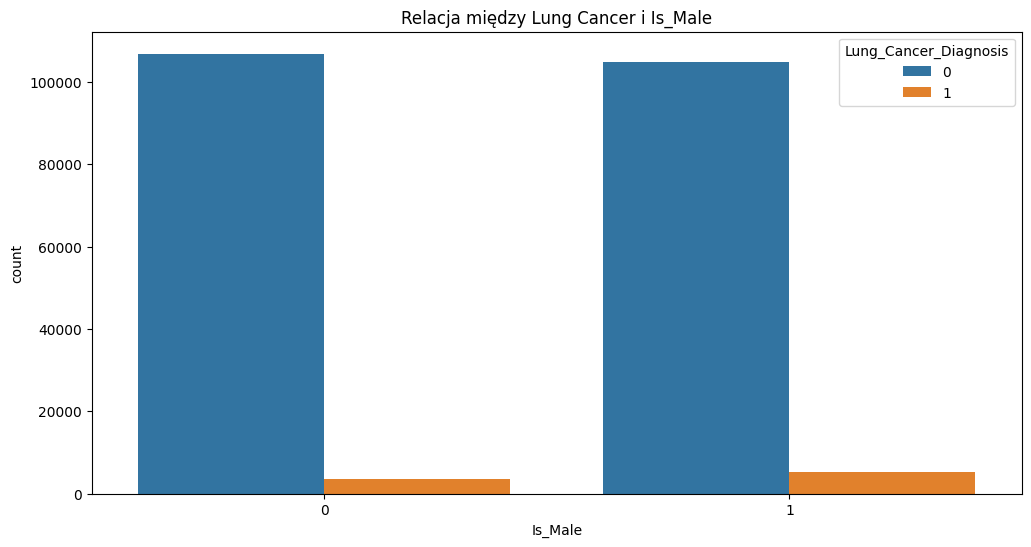




 Relacja między Lung Cancer i Good_Healthcare
Good_Healthcare             0      1     All
Lung_Cancer_Diagnosis                       
0                      169405  42266  211671
1                        7138   1823    8961
All                    176543  44089  220632




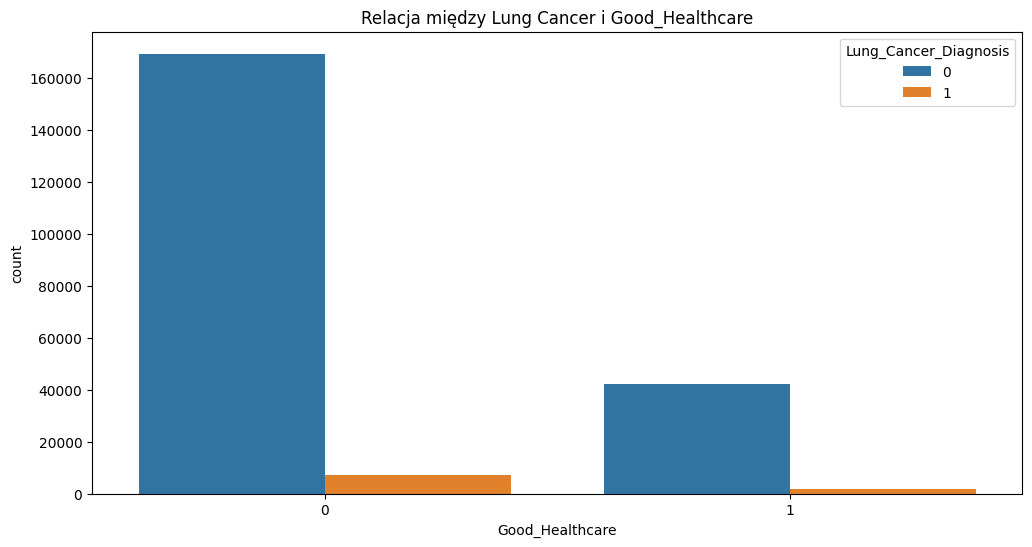




 Relacja między Lung Cancer i Developed
Developed                   0      1     All
Lung_Cancer_Diagnosis                       
0                      160975  50696  211671
1                        6766   2195    8961
All                    167741  52891  220632




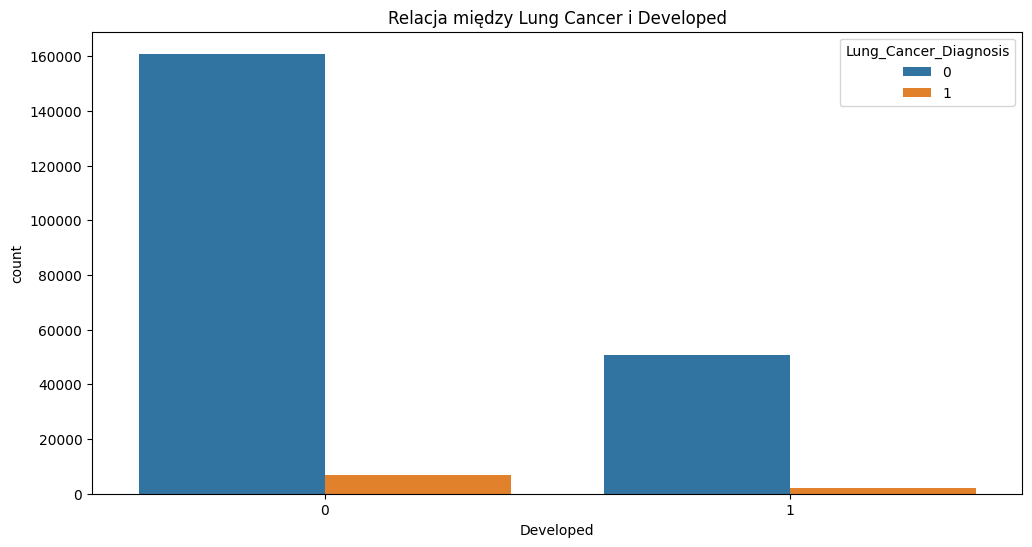

In [42]:
#Relacja między zmiennymi a etykietą docelową - Lung_Cancer_Diagnosis
for col in df.columns:
    if col != 'Lung_Cancer_Diagnosis' and col !='Country':
        print(f"\n Relacja między Lung Cancer i {col}")
        crstab = pd.crosstab(df['Lung_Cancer_Diagnosis'],df[col], margins = True)
        print(crstab)
        print("\n")
        plt.figure(figsize=(12,6))
        sns.countplot(df, x = col, hue = 'Lung_Cancer_Diagnosis')
        plt.title(f"Relacja między Lung Cancer i {col}")
        plt.show()
        print("\n")

In [ ]:
Na podstawie heatmapy!

Największe korelacje z "Lung_Cancer_Diagnosis" : 
Ciggarettes_per_day
Years_of_Smoking
Smoker